## Final Project Submission

Please fill out:
* Student name: Neha Patel
* Student pace: part time
* Scheduled project review date/time: 8/14/2020, 2:30 pm CST
* Instructor name: James Irving
* Blog post URL: https://nehap92.github.io/zipcodes_and_data_analysis


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Business Case

This is a real estate project, where the target audience is looking for answers as to which features of their house could possibly increase the value of their houses. The demographic provided is contained to the King County, Washington region

In order to accurately recommend the most determinent feature, and its influence on the price, the OLS regression model is chosen to fit the given data, and then later validated by the test train split. The value of the coeffecients thus obtained are analysed to determine the magnitute and direction of the effect that each feature has on the final price. These coefficients determine the relative effect, and should not be considered as the only feature in view.

Depending on the target audience demographic, and the buyer demographic, further analysis will be conducted as a part of the future work for better recommendations.

## Exploring and Scrubbing

In [2]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import missingno as ms
from sklearn.preprocessing import RobustScaler,StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# set the styles
pd.set_option('display.max_columns',0)

In [4]:
#obtain the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


 **Column Names and descriptions for Kings County Data Set**
- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - of Bedrooms/House
- **bathroomsNumber** - of bathrooms/bedrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
#Initiating a list to store the column names of columns to remove
df_col_to_remove = ['id']

In [6]:
#Exploring data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
#Total nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

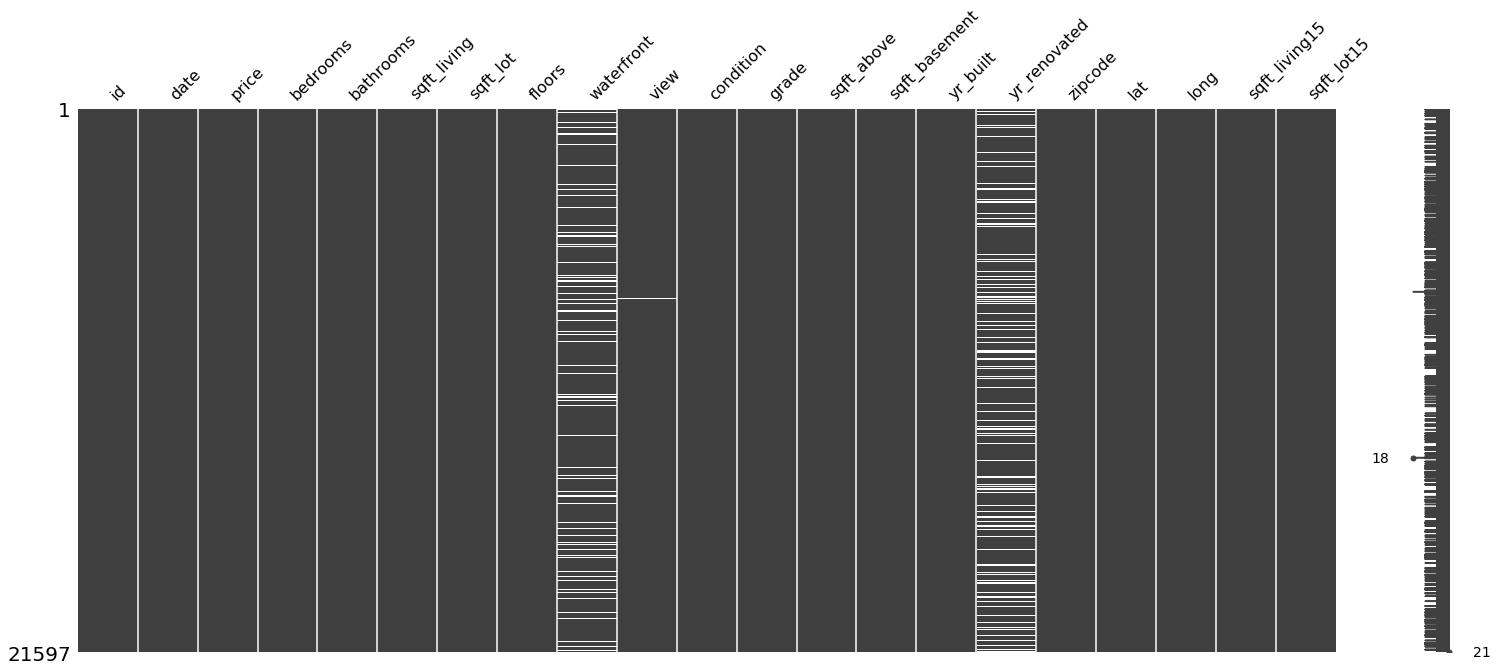

In [8]:
#null visual
ms.matrix(df);

In [9]:
#%null
df.isna().sum()*100/len(df)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Further exploring `waterfront` and `yr_renovated`

In [10]:
display(df[['waterfront','yr_renovated']])
df['yr_renovated'].unique()

,waterfront,yr_renovated
0,NaN,0.0
1,0.0,1991.0
2,0.0,NaN
3,0.0,0.0
4,0.0,0.0
...,...,...
21592,0.0,0.0
21593,0.0,0.0
21594,0.0,0.0
21595,NaN,0.0


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
def histogram(df, col,ax):
    """Generates histogram for a given column of a dataframe
    Input:
        df (DataFrame): DataFrame
        col (str): Column of the df you want to create histogram for
        ax (int): axes index"""
    return df.hist(col, ax = axes[ax])

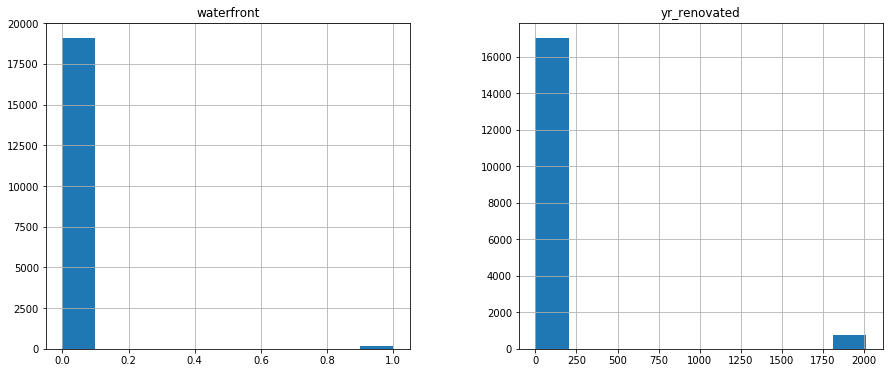

In [12]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (15,6))
axes = axes.flatten()
histogram(df,'waterfront',0);
histogram(df,'yr_renovated',1);

In [13]:
df_col_to_remove.append('yr_renovated')
df_col_to_remove

['id', 'yr_renovated']

Placeholder analysis

In [14]:
#Finding placeholders
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [15]:
#Placeholders as a % of total values
df['sqft_basement'].replace('?', np.NaN).astype(float).isna().sum()*100/len(df)

2.1021438162707784

In [16]:
#Replacing ? with NaN
df['sqft_basement']=df['sqft_basement'].replace('?', np.NaN).astype(float)

In [17]:
# %null validation
df['sqft_basement'].isna().sum()*100/len(df)

2.1021438162707784

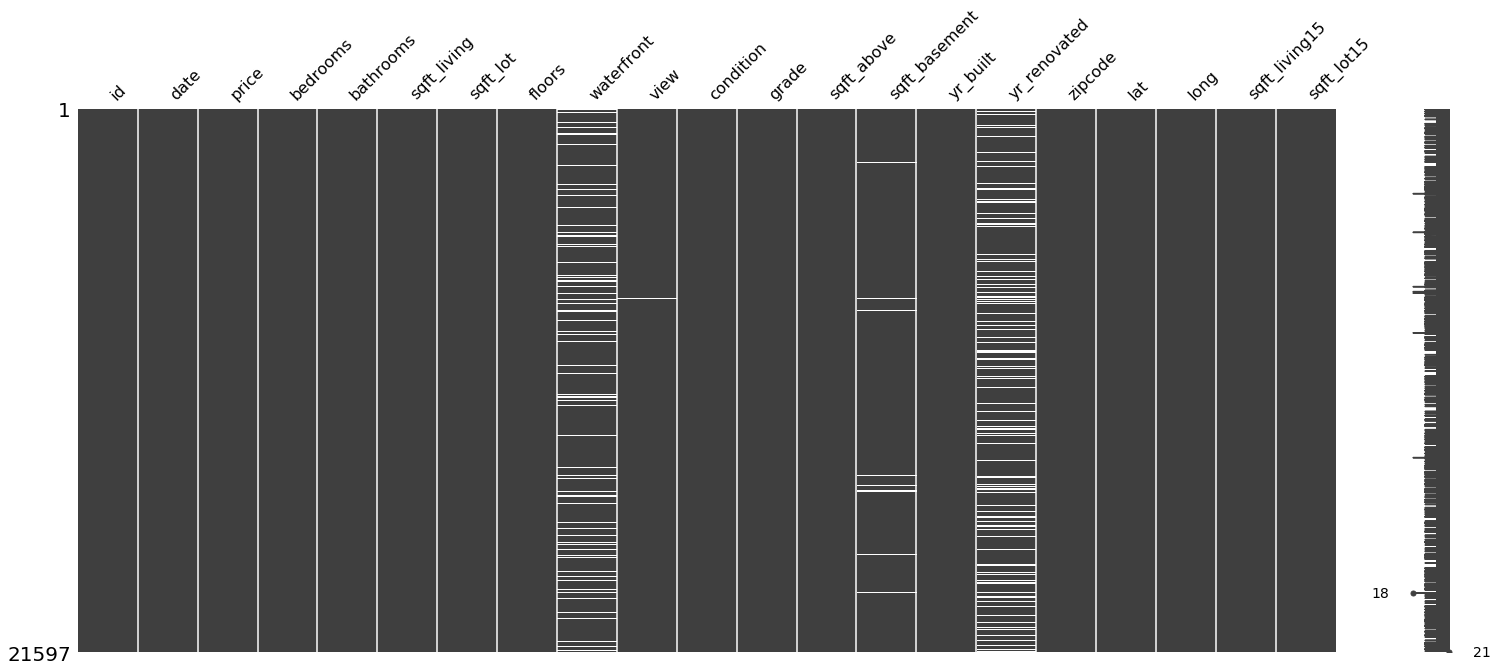

In [18]:
#Visualizing nulls again
ms.matrix(df)

Converting date sold to just year sold for ease of analysis

In [19]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [20]:
# Converting to DateTime object for ease of splitting
df['date']=pd.to_datetime(df.date)

#Seperating out the year - test
df.date[0].year

2014

In [21]:
#Creating the year sold column
df['date_year'] = df['date'].map(lambda x: x.year)
df.date_year

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: date_year, Length: 21597, dtype: int64

We dont need the date column anymore since we are interested in the year rather than the whole date

In [22]:
#Append the list of coluns to remove with date column
df_col_to_remove.append('date')
df_col_to_remove

['id', 'yr_renovated', 'date']

Age column to analyse the impact of age of the houses on price

In [23]:
df['age']=np.subtract(df['date_year'],df['yr_built'])
df['age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: age, Length: 21597, dtype: int64

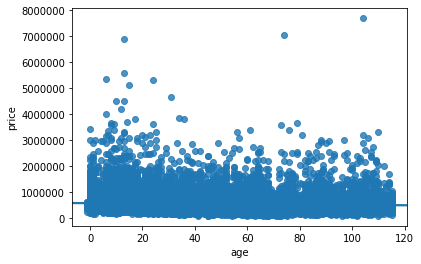

In [24]:
#Analysing the linearity of the new age column
sns.regplot(x='age', y='price',data = df);

Linearity not prominent. may have a very small influence on the OLS model

Since we have combined `date_year` and `yr_built` to create the column `age`, we will drop these columns to avoid the issue of collinearity

In [25]:
df_col_to_remove.append('date_year')
df_col_to_remove.append('yr_built')
df_col_to_remove

['id', 'yr_renovated', 'date', 'date_year', 'yr_built']

Further exploring the dataset

In [26]:
#.describe() trial
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [27]:
#.sort_values().unique() trial
df['bedrooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33], dtype=int64)

In [28]:
def column_describe(df,col,no):
    """Displays the columns statistical information
    Input:
        df (DataFrame)
        col (str): column name of interenst"""
    display(pd.DataFrame(df[col].describe()))
    display(df[col].sort_values().unique()[:no])
    display(df[col].sort_values(ascending=False).unique()[:no])

In [29]:
#Testing out the function
column_describe(df,'price',10)

,price
count,2.159700e+04
mean,5.402966e+05
std,3.673681e+05
min,7.800000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


array([78000., 80000., 81000., 82000., 82500., 83000., 84000., 85000.,
       86500., 89000.])

array([7700000., 7060000., 6890000., 5570000., 5350000., 5300000.,
       5110000., 4670000., 4500000., 4490000.])

In [30]:
for col in df.columns:
    column_describe(df,col,10)

,id
count,2.159700e+04
mean,4.580474e+09
std,2.876736e+09
min,1.000102e+06
25%,2.123049e+09
50%,3.904930e+09
75%,7.308900e+09
max,9.900000e+09


array([1000102, 1200019, 1200021, 2800031, 3600057, 3600072, 3800008,
       5200087, 6200017, 7200080], dtype=int64)

array([9900000190, 9895000040, 9842300540, 9842300485, 9842300095,
       9842300036, 9839301165, 9839301060, 9839301055, 9839300875],
      dtype=int64)

,date
count,21597
unique,372
top,2014-06-23 00:00:00
freq,142
first,2014-05-02 00:00:00
last,2015-05-27 00:00:00


array(['2014-05-02T00:00:00.000000000', '2014-05-03T00:00:00.000000000',
       '2014-05-04T00:00:00.000000000', '2014-05-05T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', '2014-05-07T00:00:00.000000000',
       '2014-05-08T00:00:00.000000000', '2014-05-09T00:00:00.000000000',
       '2014-05-10T00:00:00.000000000', '2014-05-11T00:00:00.000000000'],
      dtype='datetime64[ns]')

array(['2015-05-27T00:00:00.000000000', '2015-05-24T00:00:00.000000000',
       '2015-05-15T00:00:00.000000000', '2015-05-14T00:00:00.000000000',
       '2015-05-13T00:00:00.000000000', '2015-05-12T00:00:00.000000000',
       '2015-05-11T00:00:00.000000000', '2015-05-10T00:00:00.000000000',
       '2015-05-09T00:00:00.000000000', '2015-05-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

,price
count,2.159700e+04
mean,5.402966e+05
std,3.673681e+05
min,7.800000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


array([78000., 80000., 81000., 82000., 82500., 83000., 84000., 85000.,
       86500., 89000.])

array([7700000., 7060000., 6890000., 5570000., 5350000., 5300000.,
       5110000., 4670000., 4500000., 4490000.])

,bedrooms
count,21597.000000
mean,3.373200
std,0.926299
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

array([33, 11, 10,  9,  8,  7,  6,  5,  4,  3], dtype=int64)

,bathrooms
count,21597.000000
mean,2.115826
std,0.768984
min,0.500000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75])

array([8.  , 7.75, 7.5 , 6.75, 6.5 , 6.25, 6.  , 5.75, 5.5 , 5.25])

,sqft_living
count,21597.000000
mean,2080.321850
std,918.106125
min,370.000000
25%,1430.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


array([370, 380, 390, 410, 420, 430, 440, 460, 470, 480], dtype=int64)

array([13540, 12050, 10040,  9890,  9640,  9200,  8670,  8020,  8010,
        8000], dtype=int64)

,sqft_lot
count,2.159700e+04
mean,1.509941e+04
std,4.141264e+04
min,5.200000e+02
25%,5.040000e+03
50%,7.618000e+03
75%,1.068500e+04
max,1.651359e+06


array([520, 572, 600, 609, 635, 638, 649, 651, 675, 676], dtype=int64)

array([1651359, 1164794, 1074218, 1024068,  982998,  982278,  920423,
        881654,  871200,  843309], dtype=int64)

,floors
count,21597.000000
mean,1.494096
std,0.539683
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,3.500000


array([1. , 1.5, 2. , 2.5, 3. , 3.5])

array([3.5, 3. , 2.5, 2. , 1.5, 1. ])

,waterfront
count,19221.000000
mean,0.007596
std,0.086825
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


array([ 0.,  1., nan])

array([ 1.,  0., nan])

,view
count,21534.000000
mean,0.233863
std,0.765686
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


array([ 0.,  1.,  2.,  3.,  4., nan])

array([ 4.,  3.,  2.,  1.,  0., nan])

,condition
count,21597.000000
mean,3.409825
std,0.650546
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


array([1, 2, 3, 4, 5], dtype=int64)

array([5, 4, 3, 2, 1], dtype=int64)

,grade
count,21597.000000
mean,7.657915
std,1.173200
min,3.000000
25%,7.000000
50%,7.000000
75%,8.000000
max,13.000000


array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4], dtype=int64)

,sqft_above
count,21597.000000
mean,1788.596842
std,827.759761
min,370.000000
25%,1190.000000
50%,1560.000000
75%,2210.000000
max,9410.000000


array([370, 380, 390, 410, 420, 430, 440, 460, 470, 480], dtype=int64)

array([9410, 8860, 8570, 8020, 7880, 7850, 7680, 7420, 7320, 6720],
      dtype=int64)

,sqft_basement
count,21143.000000
mean,291.851724
std,442.498337
min,0.000000
25%,0.000000
50%,0.000000
75%,560.000000
max,4820.000000


array([ 0., 10., 20., 40., 50., 60., 65., 70., 80., 90.])

array([4820., 4130., 3500., 3480., 3260., 3000., 2850., 2810., 2730.,
       2720.])

,yr_built
count,21597.000000
mean,1970.999676
std,29.375234
min,1900.000000
25%,1951.000000
50%,1975.000000
75%,1997.000000
max,2015.000000


array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909],
      dtype=int64)

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006],
      dtype=int64)

,yr_renovated
count,17755.000000
mean,83.636778
std,399.946414
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2015.000000


array([   0., 1934., 1940., 1944., 1945., 1946., 1948., 1950., 1951.,
       1953.])

array([2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008., 2007.,
       2006.])

,zipcode
count,21597.000000
mean,98077.951845
std,53.513072
min,98001.000000
25%,98033.000000
50%,98065.000000
75%,98118.000000
max,98199.000000


array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011], dtype=int64)

array([98199, 98198, 98188, 98178, 98177, 98168, 98166, 98155, 98148,
       98146], dtype=int64)

,lat
count,21597.000000
mean,47.560093
std,0.138552
min,47.155900
25%,47.471100
50%,47.571800
75%,47.678000
max,47.777600


array([47.1559, 47.1593, 47.1622, 47.1647, 47.1764, 47.1775, 47.1776,
       47.1795, 47.1803, 47.1808])

array([47.7776, 47.7775, 47.7774, 47.7772, 47.7771, 47.777 , 47.7769,
       47.7768, 47.7767, 47.7766])

,long
count,21597.000000
mean,-122.213982
std,0.140724
min,-122.519000
25%,-122.328000
50%,-122.231000
75%,-122.125000
max,-121.315000


array([-122.519, -122.515, -122.514, -122.512, -122.511, -122.509,
       -122.507, -122.506, -122.505, -122.504])

array([-121.315, -121.316, -121.319, -121.321, -121.325, -121.352,
       -121.359, -121.364, -121.402, -121.403])

,sqft_living15
count,21597.000000
mean,1986.620318
std,685.230472
min,399.000000
25%,1490.000000
50%,1840.000000
75%,2360.000000
max,6210.000000


array([399, 460, 620, 670, 690, 700, 710, 720, 740, 750], dtype=int64)

array([6210, 6110, 5790, 5610, 5600, 5500, 5380, 5340, 5330, 5220],
      dtype=int64)

,sqft_lot15
count,21597.000000
mean,12758.283512
std,27274.441950
min,651.000000
25%,5100.000000
50%,7620.000000
75%,10083.000000
max,871200.000000


array([651, 659, 660, 748, 750, 755, 757, 758, 788, 794], dtype=int64)

array([871200, 858132, 560617, 438213, 434728, 425581, 422967, 411962,
       392040, 386812], dtype=int64)

,date_year
count,21597.000000
mean,2014.322962
std,0.467619
min,2014.000000
25%,2014.000000
50%,2014.000000
75%,2015.000000
max,2015.000000


array([2014, 2015], dtype=int64)

array([2015, 2014], dtype=int64)

,age
count,21597.000000
mean,43.323286
std,29.377285
min,-1.000000
25%,18.000000
50%,40.000000
75%,63.000000
max,115.000000


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

array([115, 114, 113, 112, 111, 110, 109, 108, 107, 106], dtype=int64)

In [31]:
df_col_to_remove

['id', 'yr_renovated', 'date', 'date_year', 'yr_built']

Initial analysis of categorical and numerical

In [32]:
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'date_year']

In [33]:
# #total numerical
df.shape[1]-len(categorical)

15

In [34]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_year',
 'age']

In [35]:
remaining_columns = ['sqft_living','sqft_lot','sqft_above','sqft_basement'
                     ,'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','age']

#Check weather didnt miss any
len(remaining_columns)

#3 less as not including price, and the columns to be removed

12

sqft_basement - check


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


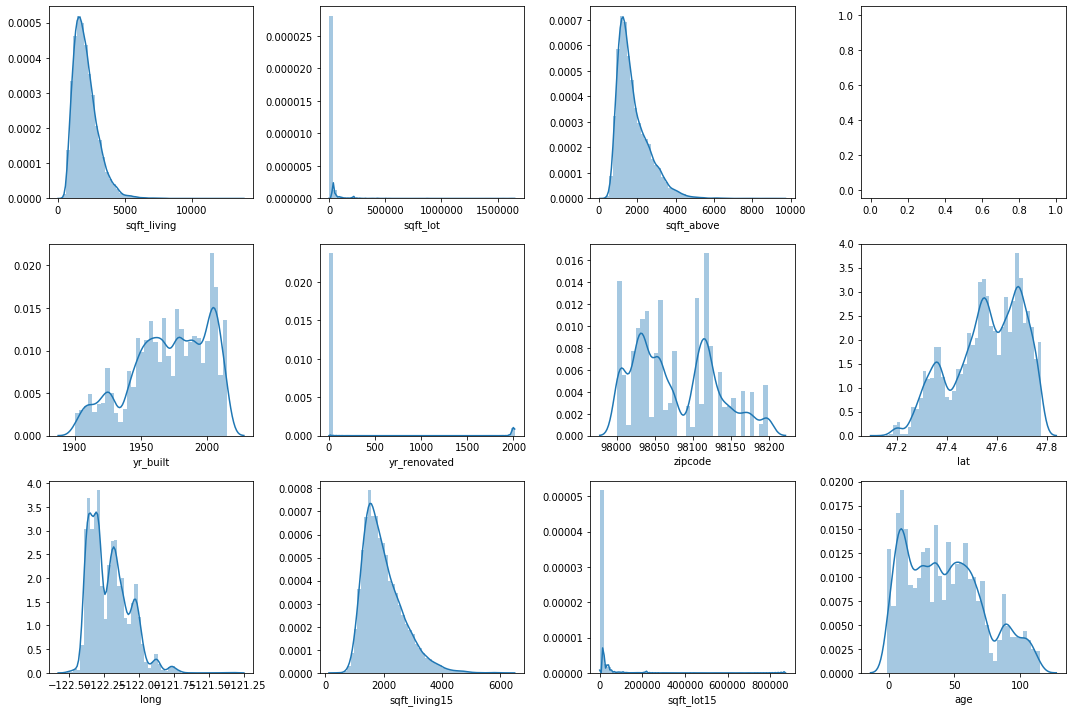

In [36]:
#Analysing normality through visualization
fig,axes = plt.subplots(ncols = 4, nrows = 3, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(remaining_columns):
#     print(i)
#     print(type(col))
    try:
        sns.distplot(df[col], ax = axes[i]);
    except:
        print(f'{col} - check')
plt.tight_layout()

In [37]:
#chcking as to why we faced an error with sqft_basement
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_year           0
age                 0
dtype: int64

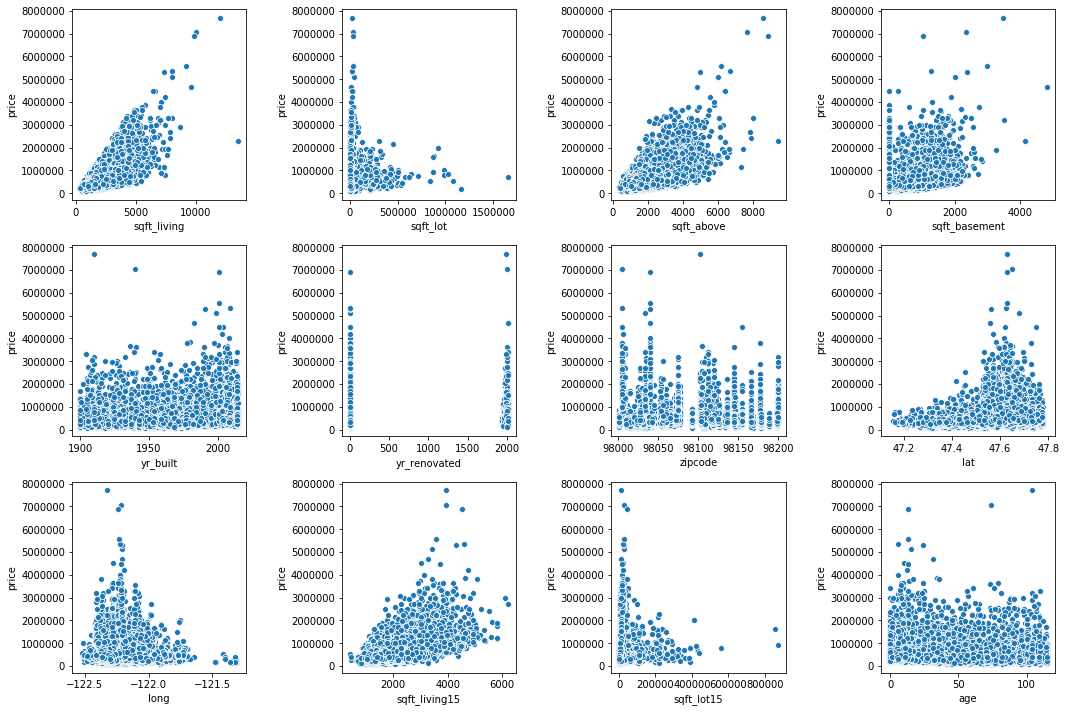

In [38]:
#checking for linearity or anomaly through visualization
fig,axes = plt.subplots(ncols = 4, nrows = 3, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(remaining_columns):
#     print(i)
#     print(type(col))
    try:
        sns.scatterplot(x=col, y='price', data=df, ax = axes[i]);
    except:
        print(f'{col} - check')
plt.tight_layout()

### Multicollinearity Test

In [39]:
abs_corr = abs(df.corr().round(3))
abs_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,age
id,1.000,0.017,0.001,0.005,0.012,0.132,0.019,0.004,0.012,0.024,0.008,0.011,0.005,0.022,0.012,0.008,0.002,0.021,0.003,0.139,0.010,0.021
price,0.017,1.000,0.309,0.526,0.702,0.090,0.257,0.276,0.396,0.036,0.668,0.605,0.325,0.054,0.130,0.053,0.307,0.022,0.585,0.083,0.004,0.054
bedrooms,0.001,0.309,1.000,0.515,0.578,0.032,0.178,0.002,0.079,0.026,0.357,0.479,0.303,0.156,0.018,0.154,0.010,0.132,0.393,0.031,0.010,0.156
bathrooms,0.005,0.526,0.515,1.000,0.756,0.088,0.503,0.067,0.186,0.126,0.666,0.687,0.283,0.507,0.051,0.205,0.024,0.225,0.570,0.088,0.027,0.508
sqft_living,0.012,0.702,0.578,0.756,1.000,0.173,0.354,0.110,0.283,0.059,0.763,0.876,0.435,0.318,0.056,0.200,0.052,0.241,0.756,0.184,0.029,0.319
sqft_lot,0.132,0.090,0.032,0.088,0.173,1.000,0.005,0.023,0.075,0.009,0.115,0.184,0.016,0.053,0.005,0.130,0.086,0.230,0.145,0.718,0.006,0.053
floors,0.019,0.257,0.178,0.503,0.354,0.005,1.000,0.022,0.028,0.264,0.459,0.524,0.245,0.489,0.004,0.060,0.049,0.126,0.280,0.011,0.022,0.490
waterfront,0.004,0.276,0.002,0.067,0.110,0.023,0.022,1.000,0.407,0.018,0.087,0.075,0.090,0.026,0.087,0.031,0.013,0.040,0.089,0.032,0.005,0.026
view,0.012,0.396,0.079,0.186,0.283,0.075,0.028,0.407,1.000,0.046,0.250,0.166,0.277,0.055,0.101,0.085,0.006,0.078,0.280,0.073,0.002,0.055
condition,0.024,0.036,0.026,0.126,0.059,0.009,0.264,0.018,0.046,1.000,0.147,0.159,0.171,0.362,0.062,0.003,0.015,0.106,0.093,0.003,0.046,0.361


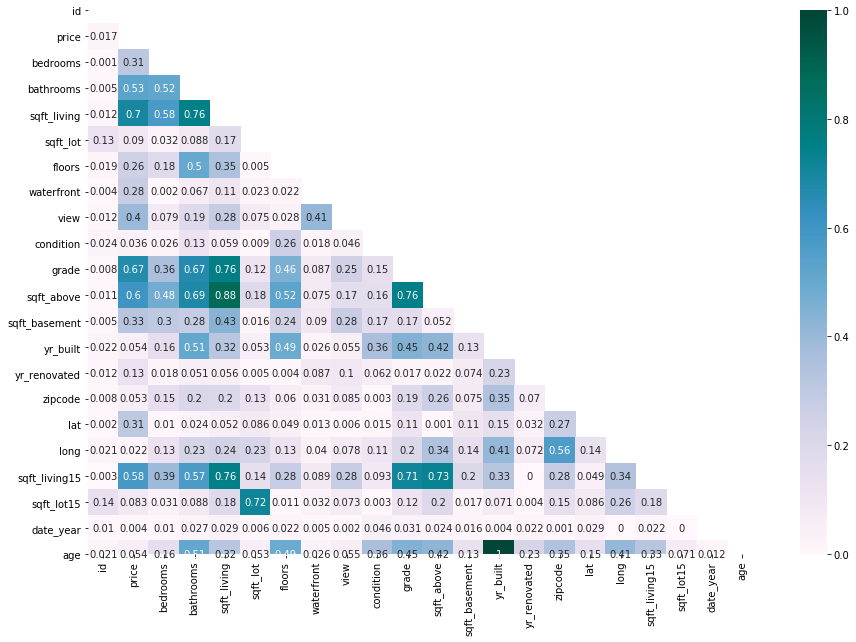

In [40]:
fig,ax = plt.subplots(figsize=(15,10))
mask = np.zeros_like(abs_corr, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx]=True
# cmap = sns.light_palette((210, 90, 60), input="husl")
# cmap = sns.cubehelix_palette(8, start=.5, rot=-.75)
sns.heatmap(abs_corr, mask=mask, annot = True, cmap = 'PuBuGn');
# sns.heatmap(abs_corr, mask=mask, annot = True, cmap = cmap);

In [41]:
df_col_to_remove.append('sqft_above')
df_col_to_remove.append('sqft_living15')
df_col_to_remove

['id',
 'yr_renovated',
 'date',
 'date_year',
 'yr_built',
 'sqft_above',
 'sqft_living15']

## Base Model

In [42]:
df1 = df.drop(df_col_to_remove, axis = 1)
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_lot15', 'age'],
      dtype='object')

In [43]:
df1_categorical = ['floors', 'waterfront', 'view', 'condition']

In [44]:
print(df1_categorical)
print(df1.columns)

['floors', 'waterfront', 'view', 'condition']
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_lot15', 'age'],
      dtype='object')


In [45]:
num_columns = ['sqft_living', 'sqft_lot','sqft_basement','zipcode', 'lat', 'long', 'sqft_lot15', 'age','grade','bedrooms', 'bathrooms']

In [46]:
# Check if not missing any column name
len(num_columns)+len(df1_categorical)==len(df1.columns)-1

True

In [47]:
#DataFrame of just the numerical columns
df_num = df1[num_columns].copy()
df_num

,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms
0,1180,5650,0.0,98178,47.5112,-122.257,5650,59,7,3,1.00
1,2570,7242,400.0,98125,47.7210,-122.319,7639,63,7,3,2.25
2,770,10000,0.0,98028,47.7379,-122.233,8062,82,6,2,1.00
3,1960,5000,910.0,98136,47.5208,-122.393,5000,49,7,4,3.00
4,1680,8080,0.0,98074,47.6168,-122.045,7503,28,8,3,2.00
...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,0.0,98103,47.6993,-122.346,1509,5,8,3,2.50
21593,2310,5813,0.0,98146,47.5107,-122.362,7200,1,8,4,2.50
21594,1020,1350,0.0,98144,47.5944,-122.299,2007,5,7,2,0.75
21595,1600,2388,0.0,98027,47.5345,-122.069,1287,11,8,3,2.50


In [48]:
len(num_columns)

11

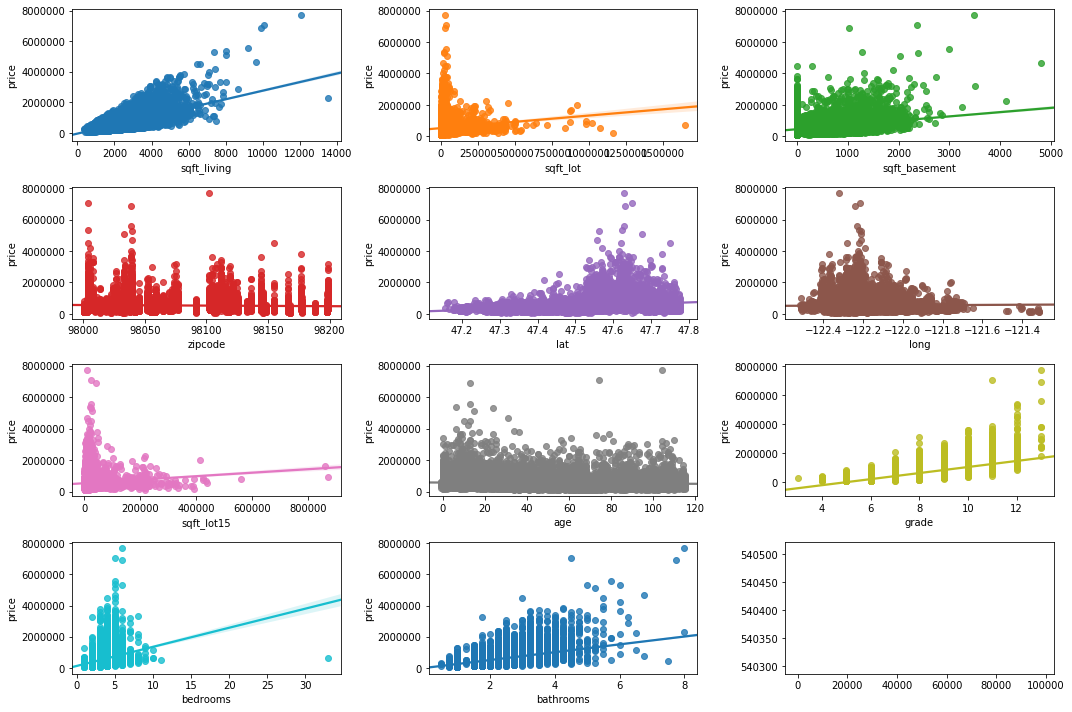

In [49]:
#Checking for linearity through visualization using regplot
fig,axes = plt.subplots(ncols = 3, nrows = 4, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(num_columns):
#     print(i)
#     print(type(col))
    try:
        sns.regplot(x=col, y='price', data=df, ax = axes[i]);
    except:
        print(f'{col} - check')
plt.tight_layout()

Standardizing numerical data

In [50]:
scaler = RobustScaler()
scaled_num_cols = scaler.fit_transform(df[num_columns])
scaled_num_cols

array([[-0.65178571, -0.3486271 ,  0.        , ...,  0.        ,
         0.        , -1.66666667],
       [ 0.58928571, -0.06660762,  0.71428571, ...,  0.        ,
         0.        ,  0.        ],
       [-1.01785714,  0.42196634,  0.        , ..., -1.        ,
        -1.        , -1.66666667],
       ...,
       [-0.79464286, -1.11036315,  0.        , ...,  0.        ,
        -1.        , -2.        ],
       [-0.27678571, -0.92648361,  0.        , ...,  1.        ,
         0.        ,  0.33333333],
       [-0.79464286, -1.15890168,  0.        , ...,  0.        ,
        -1.        , -2.        ]])

In [51]:
#Converting to a more discernable DataFrame
df_scaled = pd.DataFrame(scaled_num_cols,columns = num_columns)
df_scaled

,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms
0,-0.651786,-0.348627,0.000000,1.329412,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667
1,0.589286,-0.066608,0.714286,0.705882,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000
2,-1.017857,0.421966,0.000000,-0.435294,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667
3,0.044643,-0.463773,1.625000,0.835294,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000
4,-0.205357,0.081842,0.000000,0.105882,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.339286,-1.149159,0.000000,0.447059,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333
21593,0.357143,-0.319752,0.000000,0.952941,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333
21594,-0.794643,-1.110363,0.000000,0.929412,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000
21595,-0.276786,-0.926484,0.000000,-0.447059,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333


Categorical data dataframe

In [52]:
df1_categorical

['floors', 'waterfront', 'view', 'condition']

In [53]:
#one-hot coding - trail
pd.get_dummies(df['view'], drop_first=True)

,1.0,2.0,3.0,4.0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [54]:
df_categorical = df[df1_categorical].copy()
df_main_cat = pd.get_dummies(data = df_categorical, columns = df1_categorical, drop_first=True)
df_main_cat

,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21593,0,1,0,0,0,0,0,0,0,0,0,1,0,0
21594,0,1,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
#Converting float in the column names to avoid errors
df_main_cat.columns = ['floors_1half','floors_2','floors_2half','floors_3','floors_3half','waterfront_1','view_1','view_2','view_3','view_4',
                      'condition_2','condition_3','condition_4','condition_5']
cat_col = list(df_main_cat.columns)
cat_col

['floors_1half',
 'floors_2',
 'floors_2half',
 'floors_3',
 'floors_3half',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5']

In [56]:
df_base = pd.concat([df['price'],df_scaled, df_main_cat], axis = 1)
df_base

,price,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,221900.0,-0.651786,-0.348627,0.000000,1.329412,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.714286,0.705882,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,-1.017857,0.421966,0.000000,-0.435294,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,604000.0,0.044643,-0.463773,1.625000,0.835294,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.205357,0.081842,0.000000,0.105882,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,0.447059,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21593,400000.0,0.357143,-0.319752,0.000000,0.952941,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0
21594,402101.0,-0.794643,-1.110363,0.000000,0.929412,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
21595,400000.0,-0.276786,-0.926484,0.000000,-0.447059,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Model 1.0

In [57]:
cat_col_form = [f"C({col})" for col in cat_col]
num_predictors = '+'.join(num_columns)
col_predictors = '+'.join(cat_col_form)
formula = 'price~' + num_predictors + '+' + col_predictors
model_base = ols(formula = formula, data = df_base).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1997.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:06:57   Log-Likelihood:            -2.8814e+05
No. Observations:               21143   AIC:                         5.763e+05
Df Residuals:                   21117   BIC:                         5.765e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.579e+05   3.81e+04     12.005      0.000    3.83e+05    5.33e+05
C(floors_1half)[T.1] -8560.3028   5459.405     -1.568      0.117   -1.93e+04    2140.548
C(floors_2)[T.1]     -1.208e+04   4390.542     -2.751      0.006   -2.07e+04   -3474.633
C(floors_2half)[T.1]  1.217e+05   1.66e+04      7.317      0.000    8.91e+04    1.54e+05
C(floors_3)[T.1]      3.945e+04   9622.880      4.100      0.000    2.06e+04    5.83e+04
C(floors_3half)[T.1]  1.775e+05    7.6e+04      2.334      0.020    2.85e+04    3.27e+05
C(waterfront_1)[T.1]  5.568e+05   2.05e+04     27.120      0.000    5.17e+05    5.97e+05
C(view_1)[T.1]        1.191e+05   1.13e+04     10.511      0.000    9.69e+04    1.41e+05
C(view_2)[T.1]        7.588e+04   6940.342     10.933      0.000    6.23e+04    8.95e+04
C(view_3)[T.1]        1.518e+05   9478.823     16.012      0.000    1.33e+05     1.7e+05
C(view_4)[T.1]        3.118e+05   1.42e+04     21.908      0.000    2.84e+05     3.4e+05
C(condition_2)[T.1]   1.673e+04   4.11e+04      0.408      0.684   -6.38e+04    9.72e+04
C(condition_3)[T.1]    983.9024   3.81e+04      0.026      0.979   -7.38e+04    7.57e+04
C(condition_4)[T.1]   1.997e+04   3.81e+04      0.524      0.600   -5.48e+04    9.47e+04
C(condition_5)[T.1]   5.797e+04   3.84e+04      1.511      0.131   -1.72e+04    1.33e+05
sqft_living           2.155e+05   3870.319     55.676      0.000    2.08e+05    2.23e+05
sqft_lot               520.4567    274.919      1.893      0.058     -18.405    1059.318
sqft_basement        -2.295e+04   2491.022     -9.215      0.000   -2.78e+04   -1.81e+04
zipcode              -5.191e+04   2827.836    -18.358      0.000   -5.75e+04   -4.64e+04
lat                   1.229e+05   2250.662     54.623      0.000    1.19e+05    1.27e+05
long                 -3.835e+04   2689.477    -14.259      0.000   -4.36e+04   -3.31e+04
sqft_lot15           -1811.3358    371.089     -4.881      0.000   -2538.699   -1083.973
age                   1.251e+05   3407.445     36.705      0.000    1.18e+05    1.32e+05
grade                  1.01e+05   2089.109     48.354      0.000    9.69e+04    1.05e+05
bedrooms             -3.565e+04   1928.126    -18.487      0.000   -3.94e+04   -3.19e+04
bathrooms             3.335e+04   2463.483     13.538      0.000    2.85e+04    3.82e+04
==============================================================================
Omnibus:                    17555.573   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1659933.353
Skew:                           3.448   Prob(JB):                         0.00
Kurtosis:                      45.857   Cond. No.                         537.
==============================================================================

Warnings:
[1] Standard Erro

In [58]:
model_base.params

Intercept               457916.738123
C(floors_1half)[T.1]     -8560.302754
C(floors_2)[T.1]        -12080.431549
C(floors_2half)[T.1]    121665.549681
C(floors_3)[T.1]         39451.852719
C(floors_3half)[T.1]    177517.477463
C(waterfront_1)[T.1]    556750.105542
C(view_1)[T.1]          119106.200639
C(view_2)[T.1]           75875.577386
C(view_3)[T.1]          151772.029197
C(view_4)[T.1]          311765.116830
C(condition_2)[T.1]      16734.773728
C(condition_3)[T.1]        983.902437
C(condition_4)[T.1]      19974.924822
C(condition_5)[T.1]      57970.417596
sqft_living             215483.995742
sqft_lot                   520.456683
sqft_basement           -22953.671512
zipcode                 -51912.251201
lat                     122938.075642
long                    -38349.878128
sqft_lot15               -1811.335794
age                     125068.819304
grade                   101017.239812
bedrooms                -35645.800731
bathrooms                33350.422006
dtype: float

In [59]:
model_base.pvalues

Intercept                4.277164e-33
C(floors_1half)[T.1]     1.168980e-01
C(floors_2)[T.1]         5.937961e-03
C(floors_2half)[T.1]     2.619843e-13
C(floors_3)[T.1]         4.150593e-05
C(floors_3half)[T.1]     1.958533e-02
C(waterfront_1)[T.1]    3.014794e-159
C(view_1)[T.1]           8.899240e-26
C(view_2)[T.1]           9.561208e-28
C(view_3)[T.1]           2.305065e-57
C(view_4)[T.1]          3.207309e-105
C(condition_2)[T.1]      6.836276e-01
C(condition_3)[T.1]      9.794149e-01
C(condition_4)[T.1]      6.004250e-01
C(condition_5)[T.1]      1.307103e-01
sqft_living              0.000000e+00
sqft_lot                 5.835422e-02
sqft_basement            3.410086e-20
zipcode                  1.094425e-74
lat                      0.000000e+00
long                     6.417722e-46
sqft_lot15               1.062464e-06
age                     5.715403e-286
grade                    0.000000e+00
bedrooms                 1.035179e-75
bathrooms                1.392985e-41
dtype: float

In [60]:
model_base.pvalues<0.05

Intercept                True
C(floors_1half)[T.1]    False
C(floors_2)[T.1]         True
C(floors_2half)[T.1]     True
C(floors_3)[T.1]         True
C(floors_3half)[T.1]     True
C(waterfront_1)[T.1]     True
C(view_1)[T.1]           True
C(view_2)[T.1]           True
C(view_3)[T.1]           True
C(view_4)[T.1]           True
C(condition_2)[T.1]     False
C(condition_3)[T.1]     False
C(condition_4)[T.1]     False
C(condition_5)[T.1]     False
sqft_living              True
sqft_lot                False
sqft_basement            True
zipcode                  True
lat                      True
long                     True
sqft_lot15               True
age                      True
grade                    True
bedrooms                 True
bathrooms                True
dtype: bool

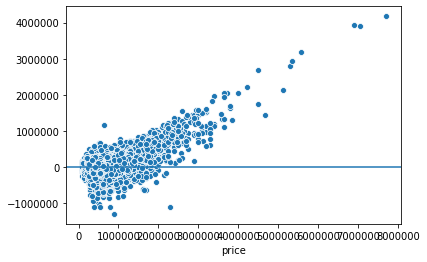

In [61]:
#Checking for Homoscedasticity
residuals_base = model_base.resid
price = df_base['price']
sns.scatterplot(price, residuals_base);
plt.axhline(0);

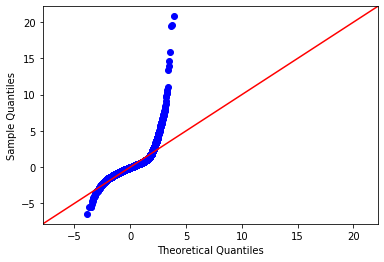

In [62]:
#Q_Q Plot
sm.graphics.qqplot(residuals_base, stats.norm, line='45', fit = True);

## Working on other columns

### Zipcodes

In [63]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [64]:
df['zipcode'].map(lambda x: int(str(x)[:4])).sort_values().unique()

array([9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9809, 9810, 9811,
       9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819], dtype=int64)

In [65]:
9800 in df['zipcode'].map(lambda x: int(str(x)[:4])).sort_values().unique()

True

In [66]:
east_rural = np.array([14,19,98024,45,50,65,65]) + np.array(98000)
east_urban = np.array([4,5,6,7,8,9,15,27,29,33,34,39,40,52,53,59,73,74,75])+np.array(98000)
north = np.array([11,28,41,72,155,160])+np.array(98000)
north_seattle = np.array([133,177])+np.array(98000)
seattle = np.array([1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18,19,21,22,24,25,26,29,34,36,44,45,54,61,64,74,
                   81,84,85,91,95,99])+np.array(98100)
south_seattle = np.array([98146])
south_rural = np.array([10,22,25,38,51])+np.array(98000)
south_urban = np.array([1,2,3,23,30,31,32,35,42,47,54,55,56,57,58,62,63,64,71,92,93,131,132,138,
                        148,151,158,166,168,170,171,178,188,190,198])+np.array(98000)
vashon_island = np.array([13,70])+np.array(98000)

print(east_rural, east_urban, north, north_seattle, seattle, south_seattle, south_rural, south_urban, vashon_island)

[ 98014  98019 196024  98045  98050  98065  98065] [98004 98005 98006 98007 98008 98009 98015 98027 98029 98033 98034 98039
 98040 98052 98053 98059 98073 98074 98075] [98011 98028 98041 98072 98155 98160] [98133 98177] [98101 98102 98103 98104 98105 98106 98107 98108 98109 98111 98112 98114
 98115 98116 98117 98118 98119 98121 98122 98124 98125 98126 98129 98134
 98136 98144 98145 98154 98161 98164 98174 98181 98184 98185 98191 98195
 98199] [98146] [98010 98022 98025 98038 98051] [98001 98002 98003 98023 98030 98031 98032 98035 98042 98047 98054 98055
 98056 98057 98058 98062 98063 98064 98071 98092 98093 98131 98132 98138
 98148 98151 98158 98166 98168 98170 98171 98178 98188 98190 98198] [98013 98070]


In [67]:
subregions = {'east_rural':east_rural,'east_urban':east_urban,'north':north,
              'north_seattle':north_seattle,'seattle':seattle,'south_seattle':south_seattle,
              'south_rural':south_rural,'south_urban':south_urban}

In [68]:
df[df['zipcode'].isin(east_rural)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,age
16,1875500060,2014-07-31,395000.0,3,2.00,1890,14040,2.0,0.0,0.0,3,7,1890,0.0,1994,0.0,98019,47.7277,-121.962,1890,14018,2014,20
45,8035350320,2014-07-18,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,3,8,3160,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232,2014,11
99,7338200240,2014-05-16,437500.0,3,2.50,2320,36847,2.0,0.0,2.0,3,9,2320,0.0,1992,0.0,98045,47.4838,-121.714,2550,35065,2014,22
129,7853210060,2015-04-06,430000.0,4,2.50,2070,4310,2.0,0.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748,2015,11
252,1422300030,2015-04-01,415000.0,3,2.25,1510,36224,2.0,0.0,0.0,3,8,1510,0.0,1991,0.0,98045,47.4616,-121.711,1730,36224,2015,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21479,7787920180,2015-05-04,534950.0,5,2.50,3220,10572,2.0,0.0,0.0,3,8,3220,0.0,2006,0.0,98019,47.7268,-121.957,2890,9090,2015,9
21532,8835770330,2014-08-19,1060000.0,2,1.50,2370,184231,2.0,0.0,0.0,3,11,2370,0.0,2005,0.0,98045,47.4543,-121.778,3860,151081,2014,9
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,3,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000,2014,1
21565,7853420110,2015-05-04,625000.0,3,3.00,2780,6000,2.0,0.0,0.0,3,9,2780,0.0,2013,NaN,98065,47.5184,-121.886,2850,6000,2015,2


In [69]:
df['subregion']=np.NaN
df.loc[df['zipcode'].isin(east_rural),'subregion']='east_rural'
df['subregion'].value_counts()

east_rural    842
Name: subregion, dtype: int64

In [70]:
df_with_subregion = df_base.copy()
df_with_subregion['subregion']=np.NaN
for name, region in subregions.items():
    df_with_subregion.loc[df_with_subregion['zipcode'].isin(region),'subregion']= name
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,subregion
0,221900.0,-0.651786,-0.348627,0.000000,1.329412,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
1,538000.0,0.589286,-0.066608,0.714286,0.705882,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,180000.0,-1.017857,0.421966,0.000000,-0.435294,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
3,604000.0,0.044643,-0.463773,1.625000,0.835294,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
4,510000.0,-0.205357,0.081842,0.000000,0.105882,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,0.447059,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,NaN
21593,400000.0,0.357143,-0.319752,0.000000,0.952941,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN
21594,402101.0,-0.794643,-1.110363,0.000000,0.929412,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN
21595,400000.0,-0.276786,-0.926484,0.000000,-0.447059,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN


In [71]:
df_with_subregion.subregion.value_counts()

Series([], Name: subregion, dtype: int64)

In [72]:
df_with_subregion['subregion']=np.NaN
df_with_subregion.loc[df_with_subregion['zipcode'].isin(east_rural),'subregion']='east_rural'
df_with_subregion['subregion'].value_counts()

Series([], Name: subregion, dtype: int64)

Because zipcode is normalized!!

In [73]:
df_with_subregion.drop('zipcode', axis = 1, inplace = True)
df_with_subregion = pd.concat([df_with_subregion,df.zipcode], axis = 1)
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,subregion,zipcode
0,221900.0,-0.651786,-0.348627,0.000000,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98178
1,538000.0,0.589286,-0.066608,0.714286,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98125
2,180000.0,-1.017857,0.421966,0.000000,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98028
3,604000.0,0.044643,-0.463773,1.625000,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,98136
4,510000.0,-0.205357,0.081842,0.000000,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,NaN,98103
21593,400000.0,0.357143,-0.319752,0.000000,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98146
21594,402101.0,-0.794643,-1.110363,0.000000,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98144
21595,400000.0,-0.276786,-0.926484,0.000000,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,NaN,98027


In [74]:
df_with_subregion['subregion']=np.NaN
df_with_subregion.loc[df_with_subregion['zipcode'].isin(east_rural),'subregion']='east_rural'
df_with_subregion['subregion'].value_counts()

east_rural    842
Name: subregion, dtype: int64

In [75]:
for name, region in subregions.items():
    df_with_subregion.loc[df_with_subregion['zipcode'].isin(region),'subregion']= name
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,subregion,zipcode
0,221900.0,-0.651786,-0.348627,0.000000,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,south_urban,98178
1,538000.0,0.589286,-0.066608,0.714286,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,seattle,98125
2,180000.0,-1.017857,0.421966,0.000000,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,north,98028
3,604000.0,0.044643,-0.463773,1.625000,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,seattle,98136
4,510000.0,-0.205357,0.081842,0.000000,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,east_urban,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,seattle,98103
21593,400000.0,0.357143,-0.319752,0.000000,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,south_seattle,98146
21594,402101.0,-0.794643,-1.110363,0.000000,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,seattle,98144
21595,400000.0,-0.276786,-0.926484,0.000000,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,east_urban,98027


In [76]:
df_with_subregion['subregion'].value_counts()

seattle          6233
east_urban       5694
south_urban      5278
north            1197
south_rural       922
east_rural        842
north_seattle     748
south_seattle     288
Name: subregion, dtype: int64

In [77]:
df_with_subregion.drop(['zipcode','lat','long'], axis = 1, inplace = True)
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,subregion
0,221900.0,-0.651786,-0.348627,0.000000,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,south_urban
1,538000.0,0.589286,-0.066608,0.714286,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,seattle
2,180000.0,-1.017857,0.421966,0.000000,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,north
3,604000.0,0.044643,-0.463773,1.625000,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,seattle
4,510000.0,-0.205357,0.081842,0.000000,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,east_urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,seattle
21593,400000.0,0.357143,-0.319752,0.000000,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,south_seattle
21594,402101.0,-0.794643,-1.110363,0.000000,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,seattle
21595,400000.0,-0.276786,-0.926484,0.000000,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,east_urban


In [78]:
# one-hot coding for subregions
region_cat = pd.get_dummies(data = df_with_subregion['subregion'], columns = 'subregion', drop_first=True)
region_cat

,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0
21593,0,0,0,0,0,1,0
21594,0,0,0,1,0,0,0
21595,1,0,0,0,0,0,0


In [79]:
df_with_subregion = pd.concat([df_with_subregion, region_cat],axis=1)
df_with_subregion.drop('subregion',axis=1,inplace = True)
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban
0,221900.0,-0.651786,-0.348627,0.000000,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,538000.0,0.589286,-0.066608,0.714286,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,180000.0,-1.017857,0.421966,0.000000,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,604000.0,0.044643,-0.463773,1.625000,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,510000.0,-0.205357,0.081842,0.000000,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
21593,400000.0,0.357143,-0.319752,0.000000,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
21594,402101.0,-0.794643,-1.110363,0.000000,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
21595,400000.0,-0.276786,-0.926484,0.000000,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [80]:
df_with_subregion

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban
0,221900.0,-0.651786,-0.348627,0.000000,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,538000.0,0.589286,-0.066608,0.714286,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,180000.0,-1.017857,0.421966,0.000000,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,604000.0,0.044643,-0.463773,1.625000,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,510000.0,-0.205357,0.081842,0.000000,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
21593,400000.0,0.357143,-0.319752,0.000000,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
21594,402101.0,-0.794643,-1.110363,0.000000,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
21595,400000.0,-0.276786,-0.926484,0.000000,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


### Renovated or not

In [81]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [82]:
#if renovated year>sold, renovation = False

df2 = df.copy()
df2['renovated_b4'] = df2['yr_renovated']
df2.loc[(df2['yr_renovated']>=df2['date_year']),'renovated_b4']=0

#converting all 0's to NaN indicating that there was no renovation done

df2.loc[(df2['renovated_b4']==0),'renovated_b4']=np.NaN
df2['renovated_b4'].unique()
df2['renovated_b4'].isna().sum()

20927

In [83]:
renovated2 = df2['renovated_b4'].map(lambda x: ~(np.isnan(x)))
pd.Series(renovated2).value_counts()

False    20927
True       670
Name: renovated_b4, dtype: int64

In [84]:
#one-hot coding for renovated
region_ren = pd.get_dummies(data = renovated2, columns = 'renovated', prefix = 'renovated', drop_first=True)
region_ren

,renovated_True
0,0
1,1
2,0
3,0
4,0
...,...
21592,0
21593,0
21594,0
21595,0


In [85]:
df_renovated = pd.concat([df_with_subregion, region_ren],axis=1)
df_renovated

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True
0,221900.0,-0.651786,-0.348627,0.000000,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,538000.0,0.589286,-0.066608,0.714286,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,180000.0,-1.017857,0.421966,0.000000,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,1.625000,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,510000.0,-0.205357,0.081842,0.000000,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
21593,400000.0,0.357143,-0.319752,0.000000,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21594,402101.0,-0.794643,-1.110363,0.000000,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
21595,400000.0,-0.276786,-0.926484,0.000000,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


### Model 2.0

In [86]:
print(f'cat_col={cat_col}\n\nnum_columns={num_columns}\n\n df_cols={df_renovated.columns}')

cat_col=['floors_1half', 'floors_2', 'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5']

num_columns=['sqft_living', 'sqft_lot', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_lot15', 'age', 'grade', 'bedrooms', 'bathrooms']

 df_cols=Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15',
       'age', 'grade', 'bedrooms', 'bathrooms', 'floors_1half', 'floors_2',
       'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'east_urban', 'north', 'north_seattle',
       'seattle', 'south_rural', 'south_seattle', 'south_urban',
       'renovated_True'],
      dtype='object')


In [87]:
num_col2 = num_columns.copy()

In [88]:
num_col2.pop(3)
num_col2.pop(3)
num_col2.pop(3)

'long'

In [89]:
cat_col2 = cat_col.copy()

In [90]:
cat_col_toadd = ['east_urban', 'north', 'north_seattle',
       'seattle', 'south_rural', 'south_seattle', 'south_urban',
       'renovated_True']
for cat in cat_col_toadd:
    cat_col2.append(cat)

In [91]:
print(f'cat_col={cat_col2}\n\nnum_columns={num_col2}\n\n df_cols={df_renovated.columns}')

cat_col=['floors_1half', 'floors_2', 'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'east_urban', 'north', 'north_seattle', 'seattle', 'south_rural', 'south_seattle', 'south_urban', 'renovated_True']

num_columns=['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15', 'age', 'grade', 'bedrooms', 'bathrooms']

 df_cols=Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15',
       'age', 'grade', 'bedrooms', 'bathrooms', 'floors_1half', 'floors_2',
       'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'east_urban', 'north', 'north_seattle',
       'seattle', 'south_rural', 'south_seattle', 'south_urban',
       'renovated_True'],
      dtype='object')


In [92]:
len(cat_col2)+len(num_col2)+1==len(df_renovated.columns)

True

In [93]:
# check cat col and numcol!!!!!
cat_col_form = [f"C({col})" for col in cat_col2]
num_predictors = '+'.join(num_col2)
col_predictors = '+'.join(cat_col_form)
formula = 'price~' + num_predictors + '+' + col_predictors
model_2 = ols(formula = formula, data = df_renovated).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1835.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:00   Log-Likelihood:            -2.8740e+05
No. Observations:               21143   AIC:                         5.749e+05
Df Residuals:                   21112   BIC:                         5.751e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.991e+05   3.73e+04     10.702      0.000    3.26e+05    4.72e+05
C(floors_1half)[T.1]    -2.94e+04   5345.252     -5.501      0.000   -3.99e+04   -1.89e+04
C(floors_2)[T.1]       -4.653e+04   4386.063    -10.608      0.000   -5.51e+04   -3.79e+04
C(floors_2half)[T.1]    6.808e+04   1.62e+04      4.215      0.000    3.64e+04    9.97e+04
C(floors_3)[T.1]       -6115.2213   9631.978     -0.635      0.526    -2.5e+04    1.28e+04
C(floors_3half)[T.1]    1.212e+05   7.35e+04      1.649      0.099   -2.29e+04    2.65e+05
C(waterfront_1)[T.1]    5.683e+05   1.99e+04     28.592      0.000    5.29e+05    6.07e+05
C(view_1)[T.1]          1.045e+05   1.09e+04      9.565      0.000    8.31e+04    1.26e+05
C(view_2)[T.1]          6.563e+04   6692.781      9.805      0.000    5.25e+04    7.87e+04
C(view_3)[T.1]          1.335e+05   9133.431     14.621      0.000    1.16e+05    1.51e+05
C(view_4)[T.1]          3.093e+05   1.38e+04     22.483      0.000    2.82e+05    3.36e+05
C(condition_2)[T.1]     1.116e+04   3.97e+04      0.281      0.778   -6.66e+04    8.89e+04
C(condition_3)[T.1]     3621.1059   3.68e+04      0.098      0.922   -6.86e+04    7.58e+04
C(condition_4)[T.1]     2.926e+04   3.68e+04      0.794      0.427   -4.29e+04    1.01e+05
C(condition_5)[T.1]     6.439e+04    3.7e+04      1.738      0.082   -8227.615    1.37e+05
C(east_urban)[T.1]      1.445e+05   6461.196     22.362      0.000    1.32e+05    1.57e+05
C(north)[T.1]           2.223e+04   8184.966      2.716      0.007    6183.732    3.83e+04
C(north_seattle)[T.1]   5.215e+04   9459.752      5.513      0.000    3.36e+04    7.07e+04
C(seattle)[T.1]         1.575e+05   7021.187     22.427      0.000    1.44e+05    1.71e+05
C(south_rural)[T.1]    -5.728e+04   8576.997     -6.679      0.000   -7.41e+04   -4.05e+04
C(south_seattle)[T.1]  -4271.0422   1.32e+04     -0.324      0.746   -3.01e+04    2.16e+04
C(south_urban)[T.1]    -8.589e+04   6477.926    -13.259      0.000   -9.86e+04   -7.32e+04
C(renovated_True)[T.1]  5.204e+04   8139.007      6.394      0.000    3.61e+04     6.8e+04
sqft_living             2.324e+05   3797.727     61.197      0.000    2.25e+05     2.4e+05
sqft_lot                 574.7657    265.646      2.164      0.031      54.079    1095.452
sqft_basement          -3.462e+04   2453.399    -14.110      0.000   -3.94e+04   -2.98e+04
sqft_lot15             -1458.8961    361.673     -4.034      0.000   -2167.803    -749.989
age                     9.501e+04   3554.048     26.732      0.000     8.8e+04    1.02e+05
grade                     8.8e+04   2051.112     42.905      0.000     8.4e+04     9.2e+04
bedrooms               -3.028e+04   1870.888    -16.185      0.000   -3.39e+04   -2.66e+04
bathrooms               2.697e+04   2400.239     11.235      0.000    2.23e+04  

In [94]:
def model_analysis(model,df):
    """takes the model and data frame and returns the model coeffecients, 
    evaluates p-values based on alpha 0.05, checks for normality through Q-Q plot,
    and analyses the homoscedasticity of our data
    input:
    model (OLS model)
    df (DataFrame): the DataFrame on wchich the analysis is done
    """
    residual = model.resid
    price = df['price']
    sns.scatterplot(price, residual);
    plt.axhline(0)
    display(model.params.to_frame().style.background_gradient())
    display(model.pvalues<0.5)
    display(sm.graphics.qqplot(model.resid, stats.norm, line='45', fit = True));

,0
Intercept,399090
C(floors_1half)[T.1],-29403.6
C(floors_2)[T.1],-46528.2
C(floors_2half)[T.1],68084.1
C(floors_3)[T.1],-6115.22
C(floors_3half)[T.1],121204
C(waterfront_1)[T.1],568292
C(view_1)[T.1],104524
C(view_2)[T.1],65625.2
C(view_3)[T.1],133540


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]          False
C(floors_3half)[T.1]       True
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]       False
C(condition_3)[T.1]       False
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
sqft_living                True
sqft_lot                   True
sqft_basement              True
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: b

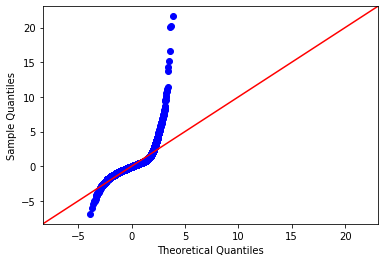

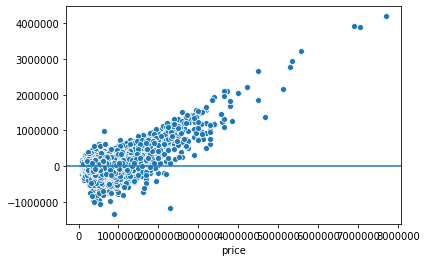

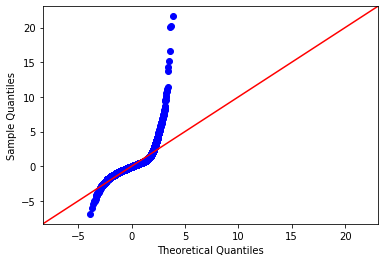

In [95]:
model_analysis(model_2,df_renovated)

## Basement

### Basement or not

In [96]:
#sqft basement at a glance
df.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [97]:
#replacing 0 with NaN and then counting the nulls to know if there is a basement or not
df_basement = df_renovated.copy()
df_basement['basement'] = df_basement['sqft_basement']
df_basement.loc[(df_basement['basement']==0),'basement']=np.NaN
df_basement['basement'].isna().sum()

13280

In [98]:
#boolean for basement or not
basement = df_basement['basement'].map(lambda x: ~(np.isnan(x)))
pd.Series(basement).value_counts()

False    13280
True      8317
Name: basement, dtype: int64

In [99]:
#one-hot encoding for basement values
basement_dum = pd.get_dummies(data = basement, columns = 'basement', prefix = 'basement', drop_first=True)
basement_dum

,basement_True
0,0
1,1
2,0
3,1
4,0
...,...
21592,0
21593,0
21594,0
21595,0


In [100]:
#joining this as a categorical form, and dropping sqft_basement from the main df_basement dataframe
df_basement.drop(['sqft_basement','basement'], axis = 1, inplace = True)
df_basement = pd.concat([df_basement,basement_dum], axis=1)
df_basement

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [101]:
#Updating cat_col and num_col before modeling
print(f'cat_col={cat_col2}\n\nnum_columns={num_col2}\n\n df_cols={df_basement.columns}')

cat_col=['floors_1half', 'floors_2', 'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'east_urban', 'north', 'north_seattle', 'seattle', 'south_rural', 'south_seattle', 'south_urban', 'renovated_True']

num_columns=['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15', 'age', 'grade', 'bedrooms', 'bathrooms']

 df_cols=Index(['price', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'age', 'grade',
       'bedrooms', 'bathrooms', 'floors_1half', 'floors_2', 'floors_2half',
       'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'east_urban', 'north', 'north_seattle', 'seattle',
       'south_rural', 'south_seattle', 'south_urban', 'renovated_True',
       'basement_True'],
      dtype='object')


In [102]:
num_col3 = num_col2.copy()
num_col3.pop(2)

'sqft_basement'

In [103]:
cat_col3 = cat_col2.copy()
cat_col3.append('basement_True')

In [104]:
#check
print(f'cat_col={cat_col3}\n\nnum_columns={num_col3}\n\n df_cols={df_basement.columns}')
len(cat_col3)+len(num_col3)+1==len(df_basement.columns)

cat_col=['floors_1half', 'floors_2', 'floors_2half', 'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'east_urban', 'north', 'north_seattle', 'seattle', 'south_rural', 'south_seattle', 'south_urban', 'renovated_True', 'basement_True']

num_columns=['sqft_living', 'sqft_lot', 'sqft_lot15', 'age', 'grade', 'bedrooms', 'bathrooms']

 df_cols=Index(['price', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'age', 'grade',
       'bedrooms', 'bathrooms', 'floors_1half', 'floors_2', 'floors_2half',
       'floors_3', 'floors_3half', 'waterfront_1', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'east_urban', 'north', 'north_seattle', 'seattle',
       'south_rural', 'south_seattle', 'south_urban', 'renovated_True',
       'basement_True'],
      dtype='object')


True

In [105]:
def ols_model(cat_col, num_col, df):
    """Generates an OLS model fit for the given dataframe.
    Input:
    cat_col (list): list of columns in the dataframe that are categorical
    num_col (list): list of columns in the dataframe that are numerical
    df (DataFrame)
    Output:
    model object from statsmodel.ols"""
    cat_col_form = [f"C({col})" for col in cat_col]
    num_predictors = '+'.join(num_col)
    col_predictors = '+'.join(cat_col_form)
    formula = 'price~' + num_predictors + '+' + col_predictors
    model = ols(formula = formula, data = df).fit()
    return model

In [106]:
model_3 = ols_model(cat_col3, num_col3, df_basement)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1865.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:04   Log-Likelihood:            -2.9357e+05
No. Observations:               21597   AIC:                         5.872e+05
Df Residuals:                   21566   BIC:                         5.875e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 3.8e+05   3.66e+04     10.371      0.000    3.08e+05    4.52e+05
C(floors_1half)[T.1]   -2.315e+04   5225.878     -4.430      0.000   -3.34e+04   -1.29e+04
C(floors_2)[T.1]       -3.624e+04   4117.132     -8.802      0.000   -4.43e+04   -2.82e+04
C(floors_2half)[T.1]    8.734e+04   1.58e+04      5.532      0.000    5.64e+04    1.18e+05
C(floors_3)[T.1]       -3592.4063   9523.940     -0.377      0.706   -2.23e+04    1.51e+04
C(floors_3half)[T.1]    1.215e+05   7.35e+04      1.653      0.098   -2.26e+04    2.66e+05
C(waterfront_1)[T.1]    5.628e+05   1.97e+04     28.580      0.000    5.24e+05    6.01e+05
C(view_1)[T.1]          1.031e+05   1.09e+04      9.480      0.000    8.18e+04    1.24e+05
C(view_2)[T.1]           6.13e+04   6592.322      9.298      0.000    4.84e+04    7.42e+04
C(view_3)[T.1]          1.263e+05   8993.213     14.042      0.000    1.09e+05    1.44e+05
C(view_4)[T.1]          2.981e+05   1.37e+04     21.832      0.000    2.71e+05    3.25e+05
C(condition_2)[T.1]     2.581e+04    3.9e+04      0.662      0.508   -5.06e+04    1.02e+05
C(condition_3)[T.1]     1.842e+04   3.62e+04      0.509      0.611   -5.25e+04    8.94e+04
C(condition_4)[T.1]     4.212e+04   3.62e+04      1.164      0.245   -2.88e+04    1.13e+05
C(condition_5)[T.1]     7.473e+04   3.64e+04      2.053      0.040    3371.443    1.46e+05
C(east_urban)[T.1]      1.434e+05   6405.565     22.389      0.000    1.31e+05    1.56e+05
C(north)[T.1]            2.12e+04   8107.861      2.615      0.009    5312.543    3.71e+04
C(north_seattle)[T.1]   5.132e+04   9388.049      5.467      0.000    3.29e+04    6.97e+04
C(seattle)[T.1]         1.563e+05   6984.322     22.385      0.000    1.43e+05     1.7e+05
C(south_rural)[T.1]    -6.042e+04   8489.691     -7.117      0.000   -7.71e+04   -4.38e+04
C(south_seattle)[T.1]  -4596.1172    1.3e+04     -0.354      0.723      -3e+04    2.08e+04
C(south_urban)[T.1]    -8.647e+04   6420.982    -13.467      0.000   -9.91e+04   -7.39e+04
C(renovated_True)[T.1]  4.982e+04   8043.117      6.194      0.000    3.41e+04    6.56e+04
C(basement_True)[T.1]  -4.118e+04   3319.613    -12.406      0.000   -4.77e+04   -3.47e+04
sqft_living             2.161e+05   3449.497     62.653      0.000    2.09e+05    2.23e+05
sqft_lot                 741.0215    260.596      2.844      0.004     230.234    1251.809
sqft_lot15             -1491.6956    355.018     -4.202      0.000   -2187.557    -795.834
age                     9.497e+04   3516.396     27.007      0.000    8.81e+04    1.02e+05
grade                   9.148e+04   1999.102     45.758      0.000    8.76e+04    9.54e+04
bedrooms               -3.061e+04   1848.746    -16.557      0.000   -3.42e+04    -2.7e+04
bathrooms               2.741e+04   2385.571     11.489      0.000    2.27e+04  

,0
Intercept,380036
C(floors_1half)[T.1],-23152.4
C(floors_2)[T.1],-36238.7
C(floors_2half)[T.1],87339.3
C(floors_3)[T.1],-3592.41
C(floors_3half)[T.1],121518
C(waterfront_1)[T.1],562774
C(view_1)[T.1],103083
C(view_2)[T.1],61298.3
C(view_3)[T.1],126285


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]          False
C(floors_3half)[T.1]       True
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]       False
C(condition_3)[T.1]       False
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]      True
sqft_living                True
sqft_lot                   True
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: b

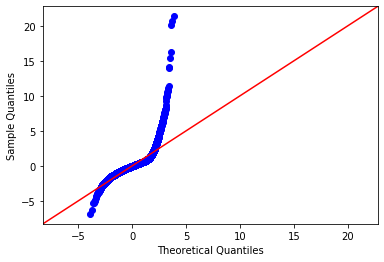

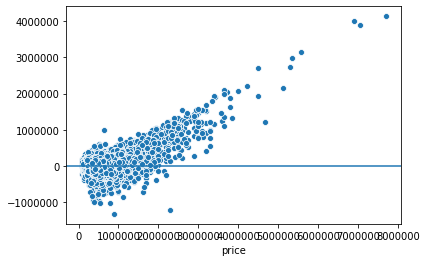

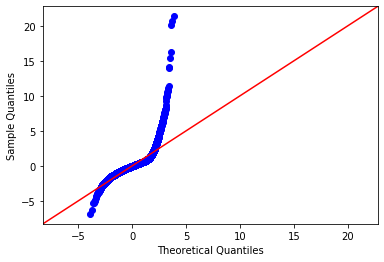

In [107]:
model_analysis(model_3, df_basement)

## Splitting into 2 Groups based on Prices, Identifying the high end group, removing outliers

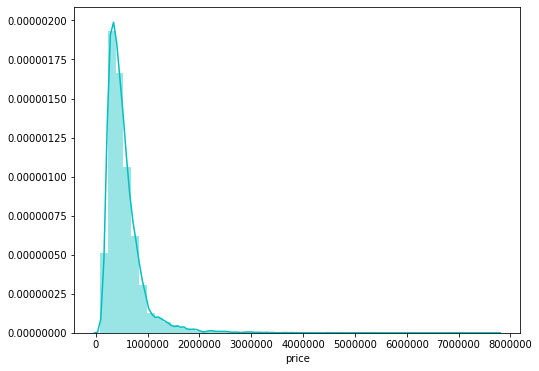

In [108]:
#price distribution
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,6))
sns.distplot(df['price'], color = 'c');

### Group1

In [109]:
def IQR(df,category):
    """Gives the IQR output for a given series in the dataframe
    Input:
    df (DataFrame)
    category (str): name of the column"""
    Q1 = df[category].quantile(0.25)
    Q3 = df[category].quantile(0.75)
    IQR = Q3-Q1
    return Q1,Q3,IQR

In [110]:
def IQR_remove_outlier(df, col):
    """Removes outlier based on IQR"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    group = df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    return group

In [111]:
group1 = IQR_remove_outlier(df_basement,'price')
group1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [112]:
model_group1 = ols_model(cat_col3,num_col3, group1)
model_group1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1950.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:            -2.6544e+05
No. Observations:               20439   AIC:                         5.309e+05
Df Residuals:                   20408   BIC:                         5.312e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.411e+05   2.04e+04     16.761      0.000    3.01e+05    3.81e+05
C(floors_1half)[T.1]    1.117e+04   2929.750      3.813      0.000    5427.214    1.69e+04
C(floors_2)[T.1]        8404.7971   2362.595      3.557      0.000    3773.921     1.3e+04
C(floors_2half)[T.1]    1.855e+04   1.03e+04      1.804      0.071   -1604.166    3.87e+04
C(floors_3)[T.1]        1.872e+04   5407.108      3.462      0.001    8123.299    2.93e+04
C(floors_3half)[T.1]    7138.8674   4.33e+04      0.165      0.869   -7.78e+04    9.21e+04
C(waterfront_1)[T.1]     1.28e+05   1.67e+04      7.645      0.000    9.52e+04    1.61e+05
C(view_1)[T.1]          7.029e+04   6482.666     10.842      0.000    5.76e+04     8.3e+04
C(view_2)[T.1]          5.764e+04   3885.948     14.832      0.000       5e+04    6.53e+04
C(view_3)[T.1]          7.294e+04   5834.358     12.501      0.000    6.15e+04    8.44e+04
C(view_4)[T.1]          1.542e+05   9930.751     15.532      0.000    1.35e+05    1.74e+05
C(condition_2)[T.1]      2.17e+04   2.16e+04      1.004      0.316   -2.07e+04    6.41e+04
C(condition_3)[T.1]     5.275e+04   2.01e+04      2.624      0.009    1.34e+04    9.22e+04
C(condition_4)[T.1]     7.313e+04   2.01e+04      3.638      0.000    3.37e+04    1.13e+05
C(condition_5)[T.1]     1.028e+05   2.02e+04      5.084      0.000    6.32e+04    1.42e+05
C(east_urban)[T.1]      1.054e+05   3560.647     29.615      0.000    9.85e+04    1.12e+05
C(north)[T.1]           7065.0675   4468.341      1.581      0.114   -1693.240    1.58e+04
C(north_seattle)[T.1]   1.569e+04   5205.367      3.013      0.003    5483.245    2.59e+04
C(seattle)[T.1]         9.907e+04   3888.414     25.477      0.000    9.14e+04    1.07e+05
C(south_rural)[T.1]    -8.848e+04   4660.423    -18.985      0.000   -9.76e+04   -7.93e+04
C(south_seattle)[T.1]  -3.773e+04   7149.706     -5.278      0.000   -5.17e+04   -2.37e+04
C(south_urban)[T.1]    -1.121e+05   3538.819    -31.674      0.000   -1.19e+05   -1.05e+05
C(renovated_True)[T.1]  2.596e+04   4768.504      5.443      0.000    1.66e+04    3.53e+04
C(basement_True)[T.1]  -9353.4927   1879.882     -4.976      0.000    -1.3e+04   -5668.773
sqft_living             1.156e+05   2113.762     54.688      0.000    1.11e+05     1.2e+05
sqft_lot                1315.4351    149.206      8.816      0.000    1022.979    1607.891
sqft_lot15              -242.8821    202.489     -1.199      0.230    -639.777     154.013
age                     5.822e+04   2021.892     28.796      0.000    5.43e+04    6.22e+04
grade                    6.98e+04   1163.729     59.977      0.000    6.75e+04    7.21e+04
bedrooms               -7600.4531   1058.648     -7.179      0.000   -9675.488   -5525.418
bathrooms               1.095e+04   1374.917      7.967      0.000    8259.425  

,0
Intercept,341123
C(floors_1half)[T.1],11169.8
C(floors_2)[T.1],8404.8
C(floors_2half)[T.1],18554.6
C(floors_3)[T.1],18721.7
C(floors_3half)[T.1],7138.87
C(waterfront_1)[T.1],127998
C(view_1)[T.1],70287.2
C(view_2)[T.1],57635.5
C(view_3)[T.1],72936.6


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]      True
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]      True
sqft_living                True
sqft_lot                   True
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: b

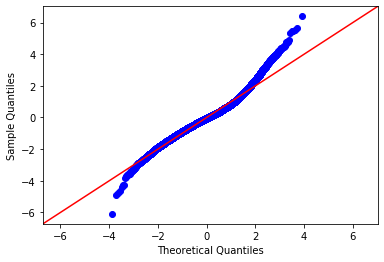

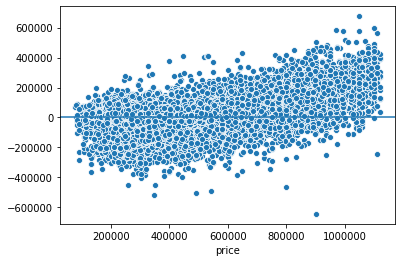

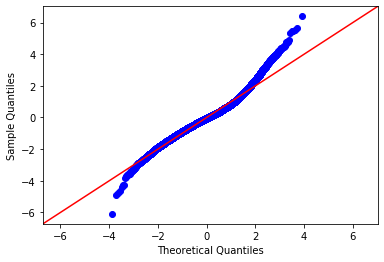

In [113]:
model_analysis(model_group1,group1)

In [114]:
len(num_col3)

7

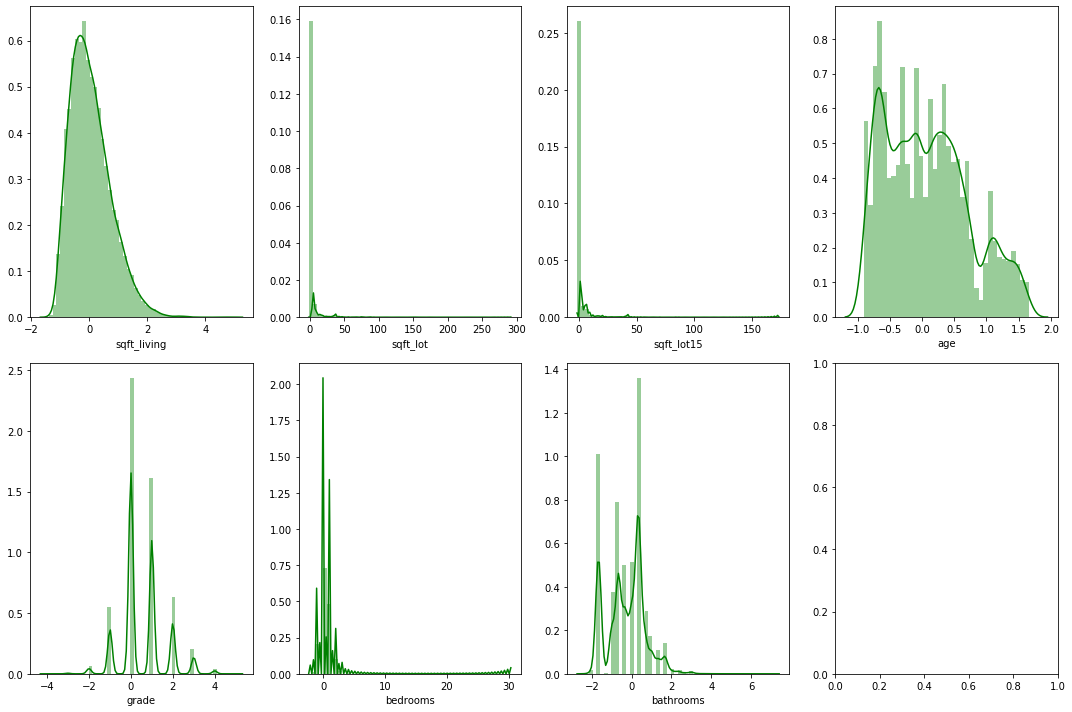

In [115]:
fig,axes = plt.subplots(ncols = 4, nrows = 2, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(num_col3):
    try:
        sns.distplot(group1[col], ax = axes[i], color = 'g');
    except:
        print(f'{col} - check')
plt.tight_layout()

In [116]:
#removing outliers from sqft_lot
group1_1 = IQR_remove_outlier(group1,'sqft_lot')
group1_1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


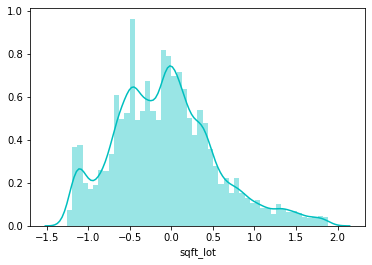

In [117]:
sns.distplot(group1_1.sqft_lot, color = 'c');

In [118]:
model_group1_1 = ols_model(cat_col3, num_col3, group1_1)
model_group1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1756.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:17   Log-Likelihood:            -2.3616e+05
No. Observations:               18215   AIC:                         4.724e+05
Df Residuals:                   18184   BIC:                         4.726e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.097e+05   2.31e+04     13.412      0.000    2.64e+05    3.55e+05
C(floors_1half)[T.1]    9503.1252   3124.262      3.042      0.002    3379.276    1.56e+04
C(floors_2)[T.1]        8618.4984   2629.518      3.278      0.001    3464.395    1.38e+04
C(floors_2half)[T.1]    2.015e+04   1.08e+04      1.859      0.063   -1091.961    4.14e+04
C(floors_3)[T.1]        2.135e+04   5527.919      3.862      0.000    1.05e+04    3.22e+04
C(floors_3half)[T.1]     1.03e+04   4.24e+04      0.243      0.808   -7.29e+04    9.35e+04
C(waterfront_1)[T.1]    1.797e+05    2.3e+04      7.811      0.000    1.35e+05    2.25e+05
C(view_1)[T.1]          6.532e+04   6709.618      9.735      0.000    5.22e+04    7.85e+04
C(view_2)[T.1]          6.095e+04   4138.359     14.727      0.000    5.28e+04    6.91e+04
C(view_3)[T.1]          8.533e+04   6604.972     12.920      0.000    7.24e+04    9.83e+04
C(view_4)[T.1]          1.653e+05   1.16e+04     14.291      0.000    1.43e+05    1.88e+05
C(condition_2)[T.1]     5.009e+04   2.44e+04      2.055      0.040    2318.951    9.79e+04
C(condition_3)[T.1]     7.759e+04   2.27e+04      3.416      0.001    3.31e+04    1.22e+05
C(condition_4)[T.1]     9.841e+04   2.27e+04      4.332      0.000    5.39e+04    1.43e+05
C(condition_5)[T.1]     1.289e+05   2.28e+04      5.648      0.000    8.42e+04    1.74e+05
C(east_urban)[T.1]       1.14e+05   4303.784     26.485      0.000    1.06e+05    1.22e+05
C(north)[T.1]           6094.4896   5168.551      1.179      0.238   -4036.358    1.62e+04
C(north_seattle)[T.1]   1.652e+04   5736.934      2.880      0.004    5277.649    2.78e+04
C(seattle)[T.1]         9.933e+04   4742.140     20.946      0.000       9e+04    1.09e+05
C(south_rural)[T.1]    -8.388e+04   5583.513    -15.023      0.000   -9.48e+04   -7.29e+04
C(south_seattle)[T.1]  -3.253e+04   7524.719     -4.323      0.000   -4.73e+04   -1.78e+04
C(south_urban)[T.1]    -1.063e+05   4261.900    -24.939      0.000   -1.15e+05   -9.79e+04
C(renovated_True)[T.1]   2.32e+04   5047.981      4.596      0.000    1.33e+04    3.31e+04
C(basement_True)[T.1]  -7183.3918   1964.511     -3.657      0.000    -1.1e+04   -3332.765
sqft_living              1.22e+05   2327.197     52.442      0.000    1.17e+05    1.27e+05
sqft_lot               -3480.0724   2040.674     -1.705      0.088   -7479.986     519.841
sqft_lot15             -1769.5130   1249.875     -1.416      0.157   -4219.386     680.360
age                     6.301e+04   2107.736     29.897      0.000    5.89e+04    6.71e+04
grade                   7.027e+04   1259.115     55.811      0.000    6.78e+04    7.27e+04
bedrooms               -8482.8730   1108.182     -7.655      0.000   -1.07e+04   -6310.732
bathrooms               1.058e+04   1439.012      7.353      0.000    7760.852  

,0
Intercept,309739
C(floors_1half)[T.1],9503.13
C(floors_2)[T.1],8618.5
C(floors_2half)[T.1],20150.6
C(floors_3)[T.1],21350.8
C(floors_3half)[T.1],10299.8
C(waterfront_1)[T.1],179695
C(view_1)[T.1],65321
C(view_2)[T.1],60945.1
C(view_3)[T.1],85334.7


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]      True
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]      True
sqft_living                True
sqft_lot                   True
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: b

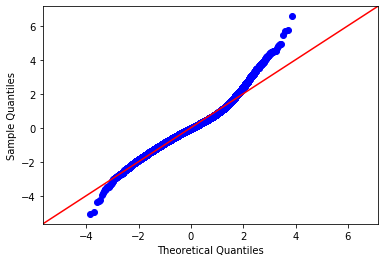

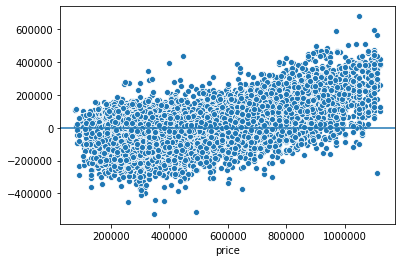

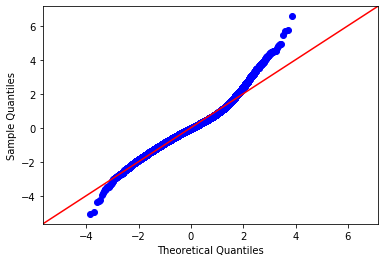

In [119]:
model_analysis(model_group1_1,group1_1)

### Identifying group 2

In [120]:
Q1,Q3,IQR = IQR(df_basement,'price')

In [121]:
group2 = df_basement[(df_basement['price']>(Q3+1.5*IQR))]
group2

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
5,1230000.0,3.133929,16.707174,18.926350,-0.600000,4.0,1.0,3.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21,2000000.0,1.017857,6.598583,2.551876,0.133333,2.0,0.0,0.666667,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
49,1350000.0,0.752679,10.165988,13.022878,0.488889,2.0,0.0,0.333333,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
69,1330000.0,1.151786,2.221435,2.516155,0.200000,1.0,2.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
125,1450000.0,0.750000,1.801771,0.733494,1.355556,1.0,1.0,0.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,1700000.0,1.714286,0.238264,0.633554,-0.866667,3.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21560,3570000.0,2.625000,0.525421,2.137267,-0.711111,3.0,2.0,3.000000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
21574,1220000.0,2.678571,0.323472,0.690949,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21581,1580000.0,1.339286,0.444110,0.502709,-0.711111,3.0,1.0,1.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [122]:
model_group2 = ols_model(cat_col3,num_col3,group2)
model_group2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     38.21
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          6.01e-149
Time:                        21:07:18   Log-Likelihood:                -16738.
No. Observations:                1158   AIC:                         3.354e+04
Df Residuals:                    1127   BIC:                         3.369e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                9.66e+05   4.77e+05      2.026      0.043    3.05e+04     1.9e+06
C(floors_1half)[T.1]   -1.084e+05   6.24e+04     -1.738      0.083   -2.31e+05     1.4e+04
C(floors_2)[T.1]        -1.19e+05      4e+04     -2.977      0.003   -1.97e+05   -4.06e+04
C(floors_2half)[T.1]   -1.194e+05   8.15e+04     -1.465      0.143   -2.79e+05    4.05e+04
C(floors_3)[T.1]       -2.631e+05   8.64e+04     -3.046      0.002   -4.33e+05   -9.37e+04
C(floors_3half)[T.1]    2.282e+05   4.77e+05      0.478      0.633   -7.08e+05    1.16e+06
C(waterfront_1)[T.1]    6.398e+05   6.75e+04      9.478      0.000    5.07e+05    7.72e+05
C(view_1)[T.1]          1.456e+05   6.68e+04      2.180      0.029    1.45e+04    2.77e+05
C(view_2)[T.1]           1.93e+04   4.34e+04      0.445      0.656   -6.58e+04    1.04e+05
C(view_3)[T.1]         -2303.3405   4.34e+04     -0.053      0.958   -8.75e+04    8.29e+04
C(view_4)[T.1]          1.724e+05    5.5e+04      3.132      0.002    6.44e+04     2.8e+05
C(condition_2)[T.1]    -5.666e+05   5.71e+05     -0.992      0.322   -1.69e+06    5.55e+05
C(condition_3)[T.1]    -6.078e+05   4.68e+05     -1.300      0.194   -1.53e+06     3.1e+05
C(condition_4)[T.1]    -4.969e+05   4.67e+05     -1.063      0.288   -1.41e+06     4.2e+05
C(condition_5)[T.1]    -5.411e+05   4.68e+05     -1.155      0.248   -1.46e+06    3.78e+05
C(east_urban)[T.1]      4.849e+05   1.02e+05      4.750      0.000    2.85e+05    6.85e+05
C(north)[T.1]            1.73e+05   1.53e+05      1.133      0.258   -1.27e+05    4.73e+05
C(north_seattle)[T.1]   3.795e+05    1.4e+05      2.705      0.007    1.04e+05    6.55e+05
C(seattle)[T.1]          5.88e+05    1.1e+05      5.332      0.000    3.72e+05    8.04e+05
C(south_rural)[T.1]     1.177e+05   2.85e+05      0.413      0.680   -4.42e+05    6.77e+05
C(south_seattle)[T.1]  -2.693e+04   2.35e+05     -0.114      0.909   -4.88e+05    4.35e+05
C(south_urban)[T.1]    -1.563e+05   1.53e+05     -1.020      0.308   -4.57e+05    1.44e+05
C(renovated_True)[T.1]  1.421e+05   5.22e+04      2.721      0.007    3.96e+04    2.45e+05
C(basement_True)[T.1]  -1.235e+05   3.42e+04     -3.609      0.000   -1.91e+05   -5.64e+04
sqft_living             3.051e+05   2.24e+04     13.610      0.000    2.61e+05    3.49e+05
sqft_lot                 219.5255   2106.212      0.104      0.917   -3913.012    4352.063
sqft_lot15             -5576.7813   3008.902     -1.853      0.064   -1.15e+04     326.898
age                     1.227e+05   3.18e+04      3.861      0.000    6.04e+04    1.85e+05
grade                   8.766e+04   1.71e+04      5.141      0.000    5.42e+04    1.21e+05
bedrooms                -4.44e+04   1.79e+04     -2.482      0.013   -7.95e+04   -9307.794
bathrooms               8.408e+04   1.86e+04      4.521      0.000    4.76e+04  

,0
Intercept,965968
C(floors_1half)[T.1],-108412
C(floors_2)[T.1],-119015
C(floors_2half)[T.1],-119435
C(floors_3)[T.1],-263145
C(floors_3half)[T.1],228200
C(waterfront_1)[T.1],639780
C(view_1)[T.1],145613
C(view_2)[T.1],19297.6
C(view_3)[T.1],-2303.34


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]            False
C(view_3)[T.1]            False
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]       False
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]      True
sqft_living                True
sqft_lot                  False
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: b

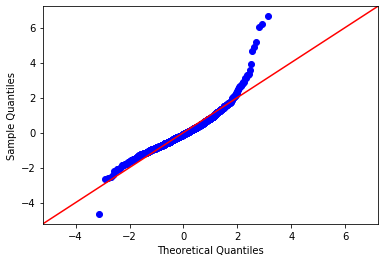

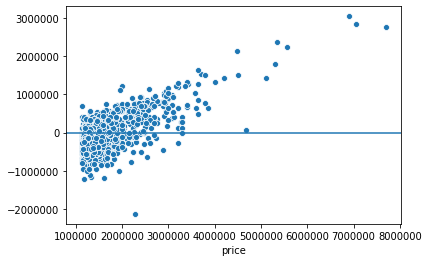

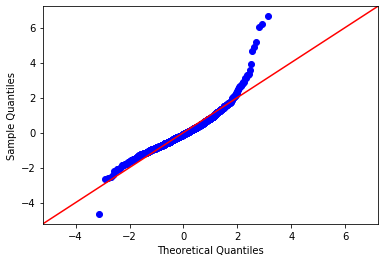

In [123]:
model_analysis(model_group2, group2)

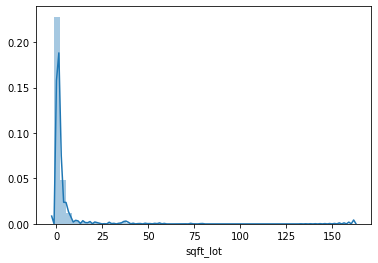

In [124]:
sns.distplot(group2.sqft_lot);

In [125]:
#removing outliers using IQR
group2_1 = IQR_remove_outlier(group2,'sqft_lot')
group2_1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
69,1330000.0,1.151786,2.221435,2.516155,0.200000,1.0,2.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
125,1450000.0,0.750000,1.801771,0.733494,1.355556,1.0,1.0,0.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
153,2250000.0,2.919643,2.166873,0.427453,-0.688889,5.0,1.0,1.333333,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
216,1510000.0,1.241071,4.580337,2.675697,0.400000,2.0,2.0,1.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1
246,2400000.0,1.553571,0.130381,2.251856,-0.577778,2.0,1.0,0.333333,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,1700000.0,1.714286,0.238264,0.633554,-0.866667,3.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21560,3570000.0,2.625000,0.525421,2.137267,-0.711111,3.0,2.0,3.000000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
21574,1220000.0,2.678571,0.323472,0.690949,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21581,1580000.0,1.339286,0.444110,0.502709,-0.711111,3.0,1.0,1.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [126]:
model_group2_1 = ols_model(cat_col3,num_col3,group2_1)
model_group2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     39.42
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          2.03e-144
Time:                        21:07:19   Log-Likelihood:                -15055.
No. Observations:                1044   AIC:                         3.017e+04
Df Residuals:                    1014   BIC:                         3.032e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.727e+05   4.85e+05      1.181      0.238   -3.79e+05    1.52e+06
C(floors_1half)[T.1]   -1.084e+05   6.33e+04     -1.711      0.087   -2.33e+05    1.59e+04
C(floors_2)[T.1]       -1.073e+05   4.17e+04     -2.575      0.010   -1.89e+05   -2.55e+04
C(floors_2half)[T.1]   -1.292e+05   8.37e+04     -1.543      0.123   -2.93e+05     3.5e+04
C(floors_3)[T.1]       -2.114e+05    8.8e+04     -2.401      0.017   -3.84e+05   -3.86e+04
C(floors_3half)[T.1]    1.048e+05   4.64e+05      0.226      0.821   -8.06e+05    1.02e+06
C(waterfront_1)[T.1]    5.028e+05      7e+04      7.186      0.000    3.65e+05     6.4e+05
C(view_1)[T.1]          1.016e+05   6.52e+04      1.558      0.120   -2.64e+04     2.3e+05
C(view_2)[T.1]         -2.701e+04   4.39e+04     -0.615      0.539   -1.13e+05    5.92e+04
C(view_3)[T.1]         -4.246e+04   4.37e+04     -0.971      0.332   -1.28e+05    4.33e+04
C(view_4)[T.1]          1.682e+05   5.57e+04      3.020      0.003    5.89e+04    2.77e+05
C(condition_2)[T.1]    -5.695e+05   5.54e+05     -1.029      0.304   -1.66e+06    5.17e+05
C(condition_3)[T.1]     -5.59e+05   4.54e+05     -1.232      0.218   -1.45e+06    3.31e+05
C(condition_4)[T.1]    -4.529e+05   4.53e+05     -0.999      0.318   -1.34e+06    4.36e+05
C(condition_5)[T.1]    -5.004e+05   4.54e+05     -1.101      0.271   -1.39e+06    3.91e+05
C(east_urban)[T.1]       8.43e+05   1.73e+05      4.863      0.000    5.03e+05    1.18e+06
C(north)[T.1]           5.627e+05   2.46e+05      2.292      0.022     8.1e+04    1.04e+06
C(north_seattle)[T.1]   8.093e+05      2e+05      4.044      0.000    4.17e+05     1.2e+06
C(seattle)[T.1]         9.789e+05   1.78e+05      5.494      0.000    6.29e+05    1.33e+06
C(south_seattle)[T.1]   2.784e+05   2.89e+05      0.965      0.335   -2.88e+05    8.45e+05
C(south_urban)[T.1]     3.534e+05    2.2e+05      1.607      0.108   -7.82e+04    7.85e+05
C(renovated_True)[T.1]  1.393e+05   5.32e+04      2.619      0.009    3.49e+04    2.44e+05
C(basement_True)[T.1]  -1.603e+05   3.59e+04     -4.472      0.000   -2.31e+05      -9e+04
sqft_living             3.726e+05   2.49e+04     14.958      0.000    3.24e+05    4.21e+05
sqft_lot                1.935e+04    1.9e+04      1.020      0.308   -1.79e+04    5.66e+04
sqft_lot15              6236.8979   1.57e+04      0.396      0.692   -2.47e+04    3.71e+04
age                     1.293e+05    3.2e+04      4.039      0.000    6.65e+04    1.92e+05
grade                   5.573e+04   1.81e+04      3.087      0.002    2.03e+04    9.12e+04
bedrooms               -6.442e+04    1.8e+04     -3.580      0.000   -9.97e+04   -2.91e+04
bathrooms                8.67e+04   1.93e+04      4.492      0.000    4.88e+04    1.25e+05
==============================================================================
O

In [127]:
abs_corr_group2 = abs(group2_1[num_col3].corr().round(3))
abs_corr_group2

,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms
sqft_living,1.000,0.352,0.256,0.289,0.642,0.411,0.698
sqft_lot,0.352,1.000,0.787,0.151,0.321,0.076,0.138
sqft_lot15,0.256,0.787,1.000,0.190,0.279,0.030,0.072
age,0.289,0.151,0.190,1.000,0.426,0.028,0.351
grade,0.642,0.321,0.279,0.426,1.000,0.136,0.511
bedrooms,0.411,0.076,0.030,0.028,0.136,1.000,0.438
bathrooms,0.698,0.138,0.072,0.351,0.511,0.438,1.000


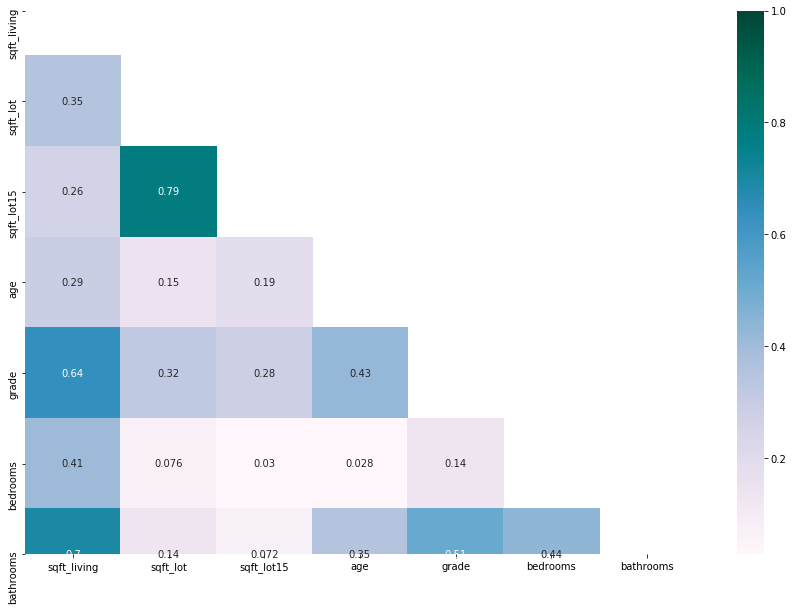

In [128]:
fig,ax = plt.subplots(figsize=(15,10))
mask = np.zeros_like(abs_corr_group2, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx]=True
sns.heatmap(abs_corr_group2, mask=mask, annot = True, cmap = 'PuBuGn');

In [129]:
group2_1.drop('sqft_lot15', axis=1, inplace = True)
numcol = num_col3.copy()
numcol

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['sqft_living',
 'sqft_lot',
 'sqft_lot15',
 'age',
 'grade',
 'bedrooms',
 'bathrooms']

In [130]:
numcol.pop(2)

'sqft_lot15'

In [131]:
model_group2_1 = ols_model(cat_col3,numcol,group2)
model_group2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     39.33
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          5.06e-149
Time:                        21:07:20   Log-Likelihood:                -16740.
No. Observations:                1158   AIC:                         3.354e+04
Df Residuals:                    1128   BIC:                         3.369e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.163e+05   4.77e+05      1.923      0.055   -1.87e+04    1.85e+06
C(floors_1half)[T.1]   -1.092e+05   6.25e+04     -1.749      0.081   -2.32e+05    1.33e+04
C(floors_2)[T.1]       -1.181e+05      4e+04     -2.950      0.003   -1.97e+05   -3.96e+04
C(floors_2half)[T.1]   -1.178e+05   8.16e+04     -1.443      0.149   -2.78e+05    4.23e+04
C(floors_3)[T.1]       -2.531e+05   8.63e+04     -2.932      0.003   -4.22e+05   -8.37e+04
C(floors_3half)[T.1]    2.343e+05   4.78e+05      0.491      0.624   -7.03e+05    1.17e+06
C(waterfront_1)[T.1]    6.364e+05   6.75e+04      9.421      0.000    5.04e+05    7.69e+05
C(view_1)[T.1]          1.452e+05   6.69e+04      2.170      0.030    1.39e+04    2.76e+05
C(view_2)[T.1]          1.611e+04   4.34e+04      0.371      0.710    -6.9e+04    1.01e+05
C(view_3)[T.1]          -272.3920   4.35e+04     -0.006      0.995   -8.56e+04     8.5e+04
C(view_4)[T.1]          1.732e+05   5.51e+04      3.144      0.002    6.51e+04    2.81e+05
C(condition_2)[T.1]    -5.622e+05   5.72e+05     -0.983      0.326   -1.68e+06     5.6e+05
C(condition_3)[T.1]    -6.072e+05   4.68e+05     -1.297      0.195   -1.53e+06    3.11e+05
C(condition_4)[T.1]    -4.992e+05   4.68e+05     -1.067      0.286   -1.42e+06    4.19e+05
C(condition_5)[T.1]    -5.417e+05   4.69e+05     -1.155      0.248   -1.46e+06    3.78e+05
C(east_urban)[T.1]      5.295e+05   9.93e+04      5.331      0.000    3.35e+05    7.24e+05
C(north)[T.1]           2.128e+05   1.51e+05      1.406      0.160   -8.42e+04     5.1e+05
C(north_seattle)[T.1]   4.135e+05   1.39e+05      2.970      0.003     1.4e+05    6.87e+05
C(seattle)[T.1]         6.349e+05   1.07e+05      5.909      0.000    4.24e+05    8.46e+05
C(south_rural)[T.1]      1.21e+05   2.85e+05      0.424      0.672   -4.39e+05    6.81e+05
C(south_seattle)[T.1]   1.463e+04   2.34e+05      0.062      0.950   -4.45e+05    4.75e+05
C(south_urban)[T.1]    -1.083e+05   1.51e+05     -0.717      0.474   -4.05e+05    1.88e+05
C(renovated_True)[T.1]  1.409e+05   5.23e+04      2.694      0.007    3.83e+04    2.43e+05
C(basement_True)[T.1]  -1.191e+05   3.42e+04     -3.485      0.001   -1.86e+05    -5.2e+04
sqft_living             3.017e+05   2.24e+04     13.490      0.000    2.58e+05    3.46e+05
sqft_lot               -2509.8131   1507.482     -1.665      0.096   -5467.597     447.971
age                     1.238e+05   3.18e+04      3.891      0.000    6.14e+04    1.86e+05
grade                   8.905e+04   1.71e+04      5.222      0.000    5.56e+04    1.23e+05
bedrooms               -4.373e+04   1.79e+04     -2.443      0.015   -7.89e+04   -8606.973
bathrooms               8.375e+04   1.86e+04      4.499      0.000    4.72e+04     1.2e+05
==============================================================================
O

,0
Intercept,916298
C(floors_1half)[T.1],-109225
C(floors_2)[T.1],-118076
C(floors_2half)[T.1],-117760
C(floors_3)[T.1],-253082
C(floors_3half)[T.1],234326
C(waterfront_1)[T.1],636382
C(view_1)[T.1],145164
C(view_2)[T.1],16114.7
C(view_3)[T.1],-272.392


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]            False
C(view_3)[T.1]            False
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]       False
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]      True
sqft_living                True
sqft_lot                   True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: bool

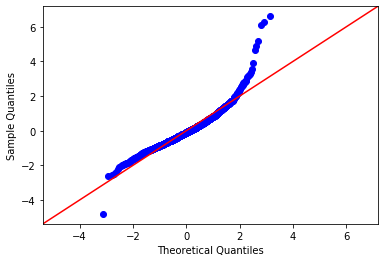

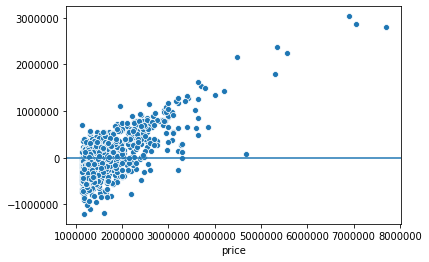

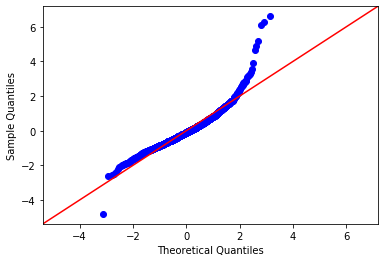

In [132]:
model_analysis(model_group2_1, group2_1)

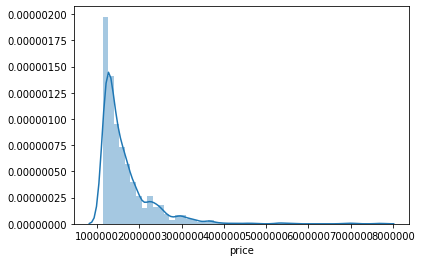

In [133]:
sns.distplot(group2_1.price)

In [134]:
group2_2 = IQR_remove_outlier(group2_1,'price')
group2_2

,price,sqft_living,sqft_lot,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
69,1330000.0,1.151786,2.221435,0.200000,1.0,2.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
125,1450000.0,0.750000,1.801771,1.355556,1.0,1.0,0.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
153,2250000.0,2.919643,2.166873,-0.688889,5.0,1.0,1.333333,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
216,1510000.0,1.241071,4.580337,0.400000,2.0,2.0,1.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1
246,2400000.0,1.553571,0.130381,-0.577778,2.0,1.0,0.333333,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,1380000.0,2.178571,1.025155,-0.888889,4.0,2.0,3.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
21552,1700000.0,1.714286,0.238264,-0.866667,3.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21574,1220000.0,2.678571,0.323472,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21581,1580000.0,1.339286,0.444110,-0.711111,3.0,1.0,1.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [135]:
model_group2_2 = ols_model(cat_col3, numcol, group2_2)
model_group2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     13.48
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           3.14e-50
Time:                        21:07:21   Log-Likelihood:                -13685.
No. Observations:                 974   AIC:                         2.743e+04
Df Residuals:                     946   BIC:                         2.756e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.706e+05   3.35e+05      2.598      0.010    2.13e+05    1.53e+06
C(floors_1half)[T.1]   -6.724e+04   4.45e+04     -1.511      0.131   -1.55e+05    2.01e+04
C(floors_2)[T.1]       -4.494e+04   2.99e+04     -1.502      0.133   -1.04e+05    1.38e+04
C(floors_2half)[T.1]   -6.144e+04   6.14e+04     -1.000      0.317   -1.82e+05    5.91e+04
C(floors_3)[T.1]       -9.647e+04   6.27e+04     -1.537      0.125    -2.2e+05    2.67e+04
C(waterfront_1)[T.1]    2.603e+05    5.5e+04      4.732      0.000    1.52e+05    3.68e+05
C(view_1)[T.1]          7.284e+04   4.73e+04      1.541      0.124   -1.99e+04    1.66e+05
C(view_2)[T.1]         -7095.4429   3.13e+04     -0.226      0.821   -6.86e+04    5.44e+04
C(view_3)[T.1]          1.388e+04   3.09e+04      0.449      0.653   -4.67e+04    7.45e+04
C(view_4)[T.1]          1.161e+05   4.08e+04      2.843      0.005     3.6e+04    1.96e+05
C(condition_2)[T.1]     -6.07e+04   3.83e+05     -0.158      0.874   -8.12e+05    6.91e+05
C(condition_3)[T.1]    -2.949e+05   3.14e+05     -0.941      0.347    -9.1e+05     3.2e+05
C(condition_4)[T.1]    -2.394e+05   3.13e+05     -0.765      0.445   -8.54e+05    3.75e+05
C(condition_5)[T.1]    -2.259e+05   3.14e+05     -0.719      0.472   -8.42e+05     3.9e+05
C(east_urban)[T.1]      5.617e+05    1.2e+05      4.674      0.000    3.26e+05    7.98e+05
C(north)[T.1]           4.378e+05    1.7e+05      2.579      0.010    1.05e+05    7.71e+05
C(north_seattle)[T.1]   5.017e+05   1.41e+05      3.569      0.000    2.26e+05    7.78e+05
C(seattle)[T.1]         6.073e+05   1.24e+05      4.908      0.000    3.65e+05     8.5e+05
C(south_seattle)[T.1]   1.061e+05      2e+05      0.530      0.596   -2.87e+05    4.99e+05
C(south_urban)[T.1]     3.131e+05   1.55e+05      2.026      0.043    9799.600    6.16e+05
C(renovated_True)[T.1]  7.873e+04   3.82e+04      2.061      0.040    3755.005    1.54e+05
C(basement_True)[T.1]  -8.689e+04   2.57e+04     -3.383      0.001   -1.37e+05   -3.65e+04
sqft_living             1.531e+05   1.98e+04      7.718      0.000    1.14e+05    1.92e+05
sqft_lot                1.194e+04   1.03e+04      1.164      0.245   -8186.469    3.21e+04
age                     9.017e+04   2.26e+04      3.992      0.000    4.58e+04    1.34e+05
grade                   5.006e+04   1.29e+04      3.867      0.000    2.47e+04    7.55e+04
bedrooms               -3.318e+04   1.29e+04     -2.567      0.010   -5.86e+04   -7817.344
bathrooms               5.155e+04   1.43e+04      3.593      0.000    2.34e+04    7.97e+04
==============================================================================
Omnibus:                       87.956   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.108
Skew:                    

In [136]:
group2_3 = group2_1[(group2_1['price']<3000000)]
group2_3

,price,sqft_living,sqft_lot,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
69,1330000.0,1.151786,2.221435,0.200000,1.0,2.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
125,1450000.0,0.750000,1.801771,1.355556,1.0,1.0,0.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1
153,2250000.0,2.919643,2.166873,-0.688889,5.0,1.0,1.333333,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
216,1510000.0,1.241071,4.580337,0.400000,2.0,2.0,1.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1
246,2400000.0,1.553571,0.130381,-0.577778,2.0,1.0,0.333333,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,1380000.0,2.178571,1.025155,-0.888889,4.0,2.0,3.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
21552,1700000.0,1.714286,0.238264,-0.866667,3.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21574,1220000.0,2.678571,0.323472,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
21581,1580000.0,1.339286,0.444110,-0.711111,3.0,1.0,1.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [137]:
ols_model(cat_col3,numcol,group2_3).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     16.59
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.56e-62
Time:                        21:07:21   Log-Likelihood:                -14154.
No. Observations:                1000   AIC:                         2.836e+04
Df Residuals:                     972   BIC:                         2.850e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.002e+05   3.71e+05      2.155      0.031    7.16e+04    1.53e+06
C(floors_1half)[T.1]   -5.966e+04   4.89e+04     -1.219      0.223   -1.56e+05    3.64e+04
C(floors_2)[T.1]       -3.939e+04   3.29e+04     -1.197      0.232   -1.04e+05    2.52e+04
C(floors_2half)[T.1]   -3.873e+04   6.66e+04     -0.582      0.561   -1.69e+05    9.19e+04
C(floors_3)[T.1]       -9.815e+04   6.89e+04     -1.424      0.155   -2.33e+05    3.71e+04
C(waterfront_1)[T.1]    3.338e+05   5.88e+04      5.679      0.000    2.18e+05    4.49e+05
C(view_1)[T.1]          1.215e+05   5.09e+04      2.387      0.017    2.16e+04    2.21e+05
C(view_2)[T.1]          1.328e+04   3.41e+04      0.390      0.697   -5.36e+04    8.01e+04
C(view_3)[T.1]          1.685e+04   3.39e+04      0.497      0.619   -4.97e+04    8.34e+04
C(view_4)[T.1]          1.268e+05   4.46e+04      2.840      0.005    3.92e+04    2.14e+05
C(condition_2)[T.1]    -1.776e+05   4.24e+05     -0.419      0.676   -1.01e+06    6.55e+05
C(condition_3)[T.1]    -3.669e+05   3.47e+05     -1.056      0.291   -1.05e+06    3.15e+05
C(condition_4)[T.1]    -2.859e+05   3.47e+05     -0.824      0.410   -9.67e+05    3.95e+05
C(condition_5)[T.1]     -2.78e+05   3.48e+05     -0.799      0.424   -9.61e+05    4.05e+05
C(east_urban)[T.1]      6.188e+05   1.33e+05      4.650      0.000    3.58e+05     8.8e+05
C(north)[T.1]           4.485e+05   1.88e+05      2.387      0.017    7.97e+04    8.17e+05
C(north_seattle)[T.1]   5.896e+05   1.54e+05      3.817      0.000    2.87e+05    8.93e+05
C(seattle)[T.1]         6.926e+05   1.37e+05      5.061      0.000    4.24e+05    9.61e+05
C(south_seattle)[T.1]   1.196e+05   2.22e+05      0.540      0.590   -3.15e+05    5.54e+05
C(south_urban)[T.1]      2.81e+05   1.71e+05      1.644      0.101   -5.45e+04    6.17e+05
C(renovated_True)[T.1]  9.441e+04   4.17e+04      2.263      0.024    1.25e+04    1.76e+05
C(basement_True)[T.1]  -1.059e+05   2.81e+04     -3.763      0.000   -1.61e+05   -5.07e+04
sqft_living             1.853e+05   2.17e+04      8.554      0.000    1.43e+05    2.28e+05
sqft_lot                1.475e+04   1.11e+04      1.323      0.186   -7120.468    3.66e+04
age                     8.517e+04   2.48e+04      3.433      0.001    3.65e+04    1.34e+05
grade                   5.965e+04   1.42e+04      4.206      0.000    3.18e+04    8.75e+04
bedrooms               -2.846e+04   1.42e+04     -2.007      0.045   -5.63e+04    -633.702
bathrooms               5.244e+04   1.56e+04      3.365      0.001    2.19e+04     8.3e+04
==============================================================================
Omnibus:                      104.365   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.332
Skew:                    

In [138]:
group2_3 = group2_1[(group2_1['price']<2000000)]
ols_model(cat_col3,numcol,group2_3).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     6.156
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.09e-19
Time:                        21:07:21   Log-Likelihood:                -11682.
No. Observations:                 855   AIC:                         2.342e+04
Df Residuals:                     827   BIC:                         2.355e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.106e+06   2.29e+05      4.841      0.000    6.58e+05    1.55e+06
C(floors_1half)[T.1]   -3.986e+04   3.27e+04     -1.219      0.223   -1.04e+05    2.43e+04
C(floors_2)[T.1]       -1176.8453   2.18e+04     -0.054      0.957    -4.4e+04    4.16e+04
C(floors_2half)[T.1]   -1.176e+04    4.7e+04     -0.250      0.803   -1.04e+05    8.06e+04
C(floors_3)[T.1]        3.005e+04   4.47e+04      0.672      0.502   -5.77e+04    1.18e+05
C(waterfront_1)[T.1]    1.794e+05   4.35e+04      4.123      0.000     9.4e+04    2.65e+05
C(view_1)[T.1]          3.937e+04   3.48e+04      1.131      0.258   -2.89e+04    1.08e+05
C(view_2)[T.1]         -3.158e+04   2.28e+04     -1.383      0.167   -7.64e+04    1.33e+04
C(view_3)[T.1]          1.531e+04   2.25e+04      0.680      0.497   -2.89e+04    5.95e+04
C(view_4)[T.1]           4.13e+04   3.12e+04      1.326      0.185   -1.99e+04    1.02e+05
C(condition_2)[T.1]    -3.254e+05   2.99e+05     -1.087      0.278   -9.13e+05    2.62e+05
C(condition_3)[T.1]     -2.33e+05   2.14e+05     -1.090      0.276   -6.52e+05    1.86e+05
C(condition_4)[T.1]     -1.81e+05   2.13e+05     -0.848      0.396      -6e+05    2.38e+05
C(condition_5)[T.1]    -1.724e+05   2.14e+05     -0.805      0.421   -5.93e+05    2.48e+05
C(east_urban)[T.1]       3.72e+05   8.22e+04      4.524      0.000    2.11e+05    5.33e+05
C(north)[T.1]           3.757e+05   1.16e+05      3.232      0.001    1.48e+05    6.04e+05
C(north_seattle)[T.1]   3.302e+05   9.89e+04      3.340      0.001    1.36e+05    5.24e+05
C(seattle)[T.1]         3.607e+05   8.51e+04      4.239      0.000    1.94e+05    5.28e+05
C(south_seattle)[T.1]   6.263e+04   1.37e+05      0.457      0.648   -2.07e+05    3.32e+05
C(south_urban)[T.1]     2.501e+05    1.1e+05      2.280      0.023    3.48e+04    4.65e+05
C(renovated_True)[T.1]   6.95e+04   2.83e+04      2.460      0.014     1.4e+04    1.25e+05
C(basement_True)[T.1]  -4.779e+04   1.86e+04     -2.565      0.010   -8.44e+04   -1.12e+04
sqft_living             7.549e+04   1.51e+04      5.014      0.000    4.59e+04    1.05e+05
sqft_lot                 883.0862   7630.476      0.116      0.908   -1.41e+04    1.59e+04
age                     3.241e+04   1.68e+04      1.929      0.054    -571.734    6.54e+04
grade                   2.289e+04   9564.739      2.393      0.017    4114.148    4.17e+04
bedrooms               -1.026e+04   9365.188     -1.096      0.273   -2.86e+04    8120.001
bathrooms                1.78e+04   1.09e+04      1.639      0.102   -3520.045    3.91e+04
==============================================================================
Omnibus:                       48.265   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.985
Skew:                    

In [139]:
group2_3 = group2_1[(group2_1['price']>2500000)]
ols_model(cat_col3,numcol,group2_3).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     8.772
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           8.83e-12
Time:                        21:07:21   Log-Likelihood:                -1199.4
No. Observations:                  83   AIC:                             2449.
Df Residuals:                      58   BIC:                             2509.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.944e+05   3.33e+05      1.184      0.241   -2.72e+05    1.06e+06
C(floors_1half)[T.1]   -9387.0409   4.61e+05     -0.020      0.984   -9.33e+05    9.14e+05
C(floors_2)[T.1]        1.853e+05      2e+05      0.928      0.357   -2.14e+05    5.85e+05
C(floors_2half)[T.1]   -2.962e+04   3.32e+05     -0.089      0.929   -6.95e+05    6.36e+05
C(floors_3)[T.1]       -5.191e+05   4.95e+05     -1.049      0.299   -1.51e+06    4.72e+05
C(floors_3half)[T.1]   -4.558e+05   7.51e+05     -0.607      0.546   -1.96e+06    1.05e+06
C(waterfront_1)[T.1]   -7.868e+04    2.4e+05     -0.328      0.744   -5.59e+05    4.02e+05
C(view_1)[T.1]          1.578e+05    2.7e+05      0.584      0.561   -3.83e+05    6.98e+05
C(view_2)[T.1]           1.36e+05   2.23e+05      0.610      0.544    -3.1e+05    5.82e+05
C(view_3)[T.1]         -4.157e+04   2.44e+05     -0.170      0.865   -5.31e+05    4.47e+05
C(view_4)[T.1]          4.925e+05   2.27e+05      2.171      0.034    3.83e+04    9.47e+05
C(condition_2)[T.1]    -6.147e+05   5.34e+05     -1.152      0.254   -1.68e+06    4.54e+05
C(condition_3)[T.1]     2.135e+05   2.23e+05      0.959      0.342   -2.32e+05    6.59e+05
C(condition_4)[T.1]     3.712e+05   1.91e+05      1.943      0.057   -1.13e+04    7.54e+05
C(condition_5)[T.1]     4.244e+05   2.14e+05      1.982      0.052   -4249.485    8.53e+05
C(east_urban)[T.1]      1.508e+05   1.76e+05      0.856      0.396   -2.02e+05    5.04e+05
C(north_seattle)[T.1]  -7.984e+05   4.51e+05     -1.772      0.082    -1.7e+06    1.03e+05
C(seattle)[T.1]         6.676e+05   2.46e+05      2.719      0.009    1.76e+05    1.16e+06
C(south_urban)[T.1]     3.744e+05   4.76e+05      0.787      0.435   -5.78e+05    1.33e+06
C(renovated_True)[T.1]  4.939e+05   2.98e+05      1.658      0.103   -1.02e+05    1.09e+06
C(basement_True)[T.1]   -7.08e+04   1.84e+05     -0.384      0.702    -4.4e+05    2.98e+05
sqft_living             4.469e+05   9.22e+04      4.848      0.000    2.62e+05    6.31e+05
sqft_lot                2.338e+05   7.35e+04      3.180      0.002    8.66e+04    3.81e+05
age                    -2.193e+05   2.22e+05     -0.987      0.328   -6.64e+05    2.25e+05
grade                   1.766e+04   1.06e+05      0.166      0.869   -1.95e+05     2.3e+05
bedrooms               -5452.2338   1.02e+05     -0.054      0.957   -2.09e+05    1.98e+05
bathrooms               5.777e+04   6.97e+04      0.829      0.410   -8.17e+04    1.97e+05
==============================================================================
Omnibus:                        2.359   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.671
Skew:                          -0.263   Prob(JB):                        0.434
Kurtosis:                       3.455

,0
Intercept,394440
C(floors_1half)[T.1],-9387.04
C(floors_2)[T.1],185271
C(floors_2half)[T.1],-29617.2
C(floors_3)[T.1],-519057
C(floors_3half)[T.1],-455782
C(waterfront_1)[T.1],-78676.9
C(view_1)[T.1],157769
C(view_2)[T.1],135986
C(view_3)[T.1],-41569.5


Intercept                  True
C(floors_1half)[T.1]      False
C(floors_2)[T.1]           True
C(floors_2half)[T.1]      False
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]      False
C(view_1)[T.1]            False
C(view_2)[T.1]            False
C(view_3)[T.1]            False
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
C(basement_True)[T.1]     False
sqft_living                True
sqft_lot                   True
age                        True
grade                     False
bedrooms                  False
bathrooms                  True
dtype: bool

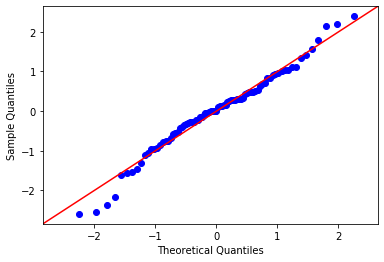

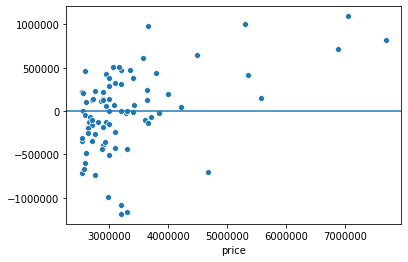

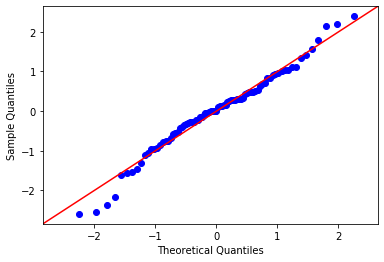

In [140]:
model_group2_3 = ols_model(cat_col3,numcol,group2_3)
model_analysis(model_group2_3, group2_3)

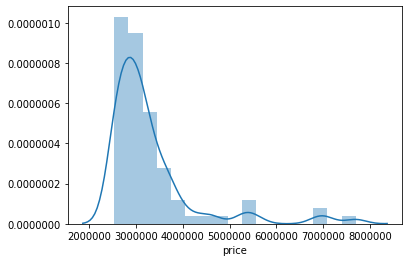

In [141]:
sns.distplot(group2_3.price)

In [142]:
columns_drop = ['floors_1half','floors_2','floors_2half','floors_3','floors_3half',
                'waterfront_1','view_1','view_2','view_3','view_4','basement_True','grade','bedrooms']

In [143]:
cat_col4 = cat_col3.copy()
cat_col4

['floors_1half',
 'floors_2',
 'floors_2half',
 'floors_3',
 'floors_3half',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'east_urban',
 'north',
 'north_seattle',
 'seattle',
 'south_rural',
 'south_seattle',
 'south_urban',
 'renovated_True',
 'basement_True']

In [144]:
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(0)
cat_col4.pop(-1)
cat_col4

['condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'east_urban',
 'north',
 'north_seattle',
 'seattle',
 'south_rural',
 'south_seattle',
 'south_urban',
 'renovated_True']

In [145]:
num_col4=numcol.copy()
num_col4

['sqft_living', 'sqft_lot', 'age', 'grade', 'bedrooms', 'bathrooms']

In [146]:
num_col4.pop(-2)
num_col4.pop(-2)
num_col4

['sqft_living', 'sqft_lot', 'age', 'bathrooms']

In [147]:
model_group2_3 = ols_model(cat_col4,num_col4, group2_3)
model_group2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     19.00
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           4.96e-17
Time:                        21:07:22   Log-Likelihood:                -1206.1
No. Observations:                  83   AIC:                             2436.
Df Residuals:                      71   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.966e+05   1.82e+05      4.376      0.000    4.34e+05    1.16e+06
C(condition_2)[T.1]    -3.858e+05   4.67e+05     -0.826      0.412   -1.32e+06    5.46e+05
C(condition_3)[T.1]     2.446e+05   1.88e+05      1.300      0.198    -1.3e+05     6.2e+05
C(condition_4)[T.1]     4.426e+05   1.61e+05      2.743      0.008    1.21e+05    7.64e+05
C(condition_5)[T.1]     4.952e+05   1.92e+05      2.575      0.012    1.12e+05    8.79e+05
C(east_urban)[T.1]      1.635e+05   1.58e+05      1.033      0.305   -1.52e+05    4.79e+05
C(north_seattle)[T.1]  -4.169e+05   3.76e+05     -1.108      0.272   -1.17e+06    3.34e+05
C(seattle)[T.1]         4.726e+05   2.15e+05      2.193      0.032     4.3e+04    9.02e+05
C(south_urban)[T.1]     5.773e+05   4.41e+05      1.309      0.195   -3.02e+05    1.46e+06
C(renovated_True)[T.1]  5.757e+05   2.56e+05      2.245      0.028    6.43e+04    1.09e+06
sqft_living             3.968e+05   6.53e+04      6.073      0.000    2.66e+05    5.27e+05
sqft_lot                2.294e+05   6.14e+04      3.736      0.000    1.07e+05    3.52e+05
age                    -2.697e+05   1.59e+05     -1.695      0.094   -5.87e+05    4.75e+04
bathrooms               7.713e+04   5.98e+04      1.291      0.201    -4.2e+04    1.96e+05
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.239
Skew:                          -0.078   Prob(JB):                        0.887
Kurtosis:                       3.212   Cond. No.                     1.79e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
abs_corr_group2_3 = abs(group2_3[num_col4].corr().round(3))
abs_corr_group2_3

,sqft_living,sqft_lot,age,bathrooms
sqft_living,1.000,0.466,0.012,0.693
sqft_lot,0.466,1.000,0.055,0.256
age,0.012,0.055,1.000,0.131
bathrooms,0.693,0.256,0.131,1.000


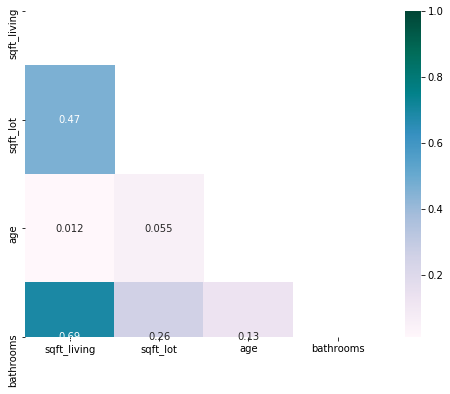

In [149]:
fig,ax = plt.subplots(figsize=(8,6))
mask = np.zeros_like(abs_corr_group2_3, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx]=True
sns.heatmap(abs_corr_group2_3, mask=mask, annot = True, cmap = 'PuBuGn');

,0
Intercept,796597
C(condition_2)[T.1],-385841
C(condition_3)[T.1],244583
C(condition_4)[T.1],442613
C(condition_5)[T.1],495241
C(east_urban)[T.1],163549
C(north_seattle)[T.1],-416915
C(seattle)[T.1],472628
C(south_urban)[T.1],577335
C(renovated_True)[T.1],575684


Intercept                 True
C(condition_2)[T.1]       True
C(condition_3)[T.1]       True
C(condition_4)[T.1]       True
C(condition_5)[T.1]       True
C(east_urban)[T.1]        True
C(north_seattle)[T.1]     True
C(seattle)[T.1]           True
C(south_urban)[T.1]       True
C(renovated_True)[T.1]    True
sqft_living               True
sqft_lot                  True
age                       True
bathrooms                 True
dtype: bool

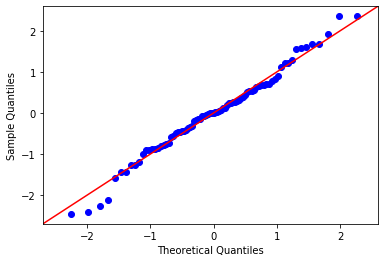

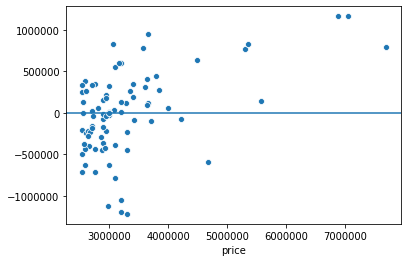

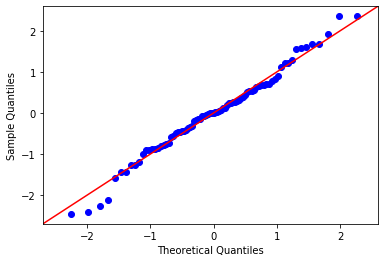

In [150]:
model_analysis(model_group2_3,group2_3)

## Spliting into groups based on basement - Group1

In [151]:
df_basement

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [152]:
df_basement_1 = df_basement.copy()
df_basement_1.drop('basement_True', axis =1, inplace = True)

In [153]:
df_basement_1['basement'] = df['sqft_basement']
df_basement_1.loc[(df_basement_1['basement'].isnull()),'basement']=0
df_basement_1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,400.0
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,910.0
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0


### No Basement

In [154]:
no_basement = df_basement_1.loc[df_basement_1['basement'] == 0]
no_basement

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.0
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0
6,257500.0,-0.174107,-0.141541,-0.160747,-0.466667,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
7,291850.0,-0.758929,0.370771,0.419627,0.266667,0.0,0.0,-1.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0


In [155]:
no_basement_grp1 = IQR_remove_outlier(no_basement,'price')
no_basement_grp1 = IQR_remove_outlier(no_basement_grp1,'sqft_lot')
no_basement_grp1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.0
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0
6,257500.0,-0.174107,-0.141541,-0.160747,-0.466667,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
7,291850.0,-0.758929,0.370771,0.419627,0.266667,0.0,0.0,-1.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0


In [156]:
catcol = cat_col3.copy()
catcol

['floors_1half',
 'floors_2',
 'floors_2half',
 'floors_3',
 'floors_3half',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'east_urban',
 'north',
 'north_seattle',
 'seattle',
 'south_rural',
 'south_seattle',
 'south_urban',
 'renovated_True',
 'basement_True']

In [157]:
catcol.pop()

'basement_True'

In [158]:
model_no_basement = ols_model(catcol, num_col3,no_basement_grp1)
model_no_basement.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1219.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:24   Log-Likelihood:            -1.4523e+05
No. Observations:               11277   AIC:                         2.905e+05
Df Residuals:                   11247   BIC:                         2.907e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.358e+05   2.24e+04     14.961      0.000    2.92e+05     3.8e+05
C(floors_1half)[T.1]    7025.6462   3721.208      1.888      0.059    -268.573    1.43e+04
C(floors_2)[T.1]       -4590.8582   3132.511     -1.466      0.143   -1.07e+04    1549.411
C(floors_2half)[T.1]    2.475e+04   1.35e+04      1.829      0.067   -1768.581    5.13e+04
C(floors_3)[T.1]        1.565e+04   6026.861      2.597      0.009    3837.103    2.75e+04
C(floors_3half)[T.1]    1.382e+04   3.91e+04      0.354      0.723   -6.27e+04    9.04e+04
C(waterfront_1)[T.1]    2.048e+05   3.21e+04      6.379      0.000    1.42e+05    2.68e+05
C(view_1)[T.1]          9.194e+04   1.13e+04      8.145      0.000    6.98e+04    1.14e+05
C(view_2)[T.1]          6.018e+04   6188.266      9.725      0.000    4.81e+04    7.23e+04
C(view_3)[T.1]          7.715e+04    1.1e+04      7.041      0.000    5.57e+04    9.86e+04
C(view_4)[T.1]          1.531e+05   1.97e+04      7.787      0.000    1.15e+05    1.92e+05
C(condition_2)[T.1]     3.578e+04    2.4e+04      1.489      0.137   -1.13e+04    8.29e+04
C(condition_3)[T.1]     6.512e+04    2.2e+04      2.959      0.003     2.2e+04    1.08e+05
C(condition_4)[T.1]     8.086e+04    2.2e+04      3.674      0.000    3.77e+04    1.24e+05
C(condition_5)[T.1]     1.058e+05   2.22e+04      4.762      0.000    6.23e+04    1.49e+05
C(east_urban)[T.1]      1.098e+05   4396.006     24.970      0.000    1.01e+05    1.18e+05
C(north)[T.1]           6899.6614   5545.278      1.244      0.213   -3970.054    1.78e+04
C(north_seattle)[T.1]   1.925e+04   6430.597      2.994      0.003    6645.913    3.19e+04
C(seattle)[T.1]         9.139e+04   5119.719     17.851      0.000    8.14e+04    1.01e+05
C(south_rural)[T.1]    -8.619e+04   5481.214    -15.725      0.000   -9.69e+04   -7.54e+04
C(south_seattle)[T.1]  -3.723e+04   8331.922     -4.469      0.000   -5.36e+04   -2.09e+04
C(south_urban)[T.1]    -1.046e+05   4316.672    -24.232      0.000   -1.13e+05   -9.61e+04
C(renovated_True)[T.1]  1.016e+04   6205.598      1.637      0.102   -2004.668    2.23e+04
sqft_living             1.323e+05   3027.593     43.682      0.000    1.26e+05    1.38e+05
sqft_lot               -1731.2257   2310.773     -0.749      0.454   -6260.745    2798.293
sqft_lot15             -2416.9389   1297.109     -1.863      0.062   -4959.499     125.621
age                     5.277e+04   2612.442     20.198      0.000    4.76e+04    5.79e+04
grade                    6.07e+04   1456.374     41.678      0.000    5.78e+04    6.36e+04
bedrooms               -7652.3833   1499.232     -5.104      0.000   -1.06e+04   -4713.627
bathrooms               7498.1848   1855.171      4.042      0.000    3861.726    1.11e+04
==============================================================================
O

,0
Intercept,335820
C(floors_1half)[T.1],7025.65
C(floors_2)[T.1],-4590.86
C(floors_2half)[T.1],24748.9
C(floors_3)[T.1],15650.8
C(floors_3half)[T.1],13817.3
C(waterfront_1)[T.1],204766
C(view_1)[T.1],91941.4
C(view_2)[T.1],60182.4
C(view_3)[T.1],77150.7


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]           True
C(floors_2half)[T.1]       True
C(floors_3)[T.1]           True
C(floors_3half)[T.1]      False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]      True
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
sqft_living                True
sqft_lot                   True
sqft_lot15                 True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
dtype: bool

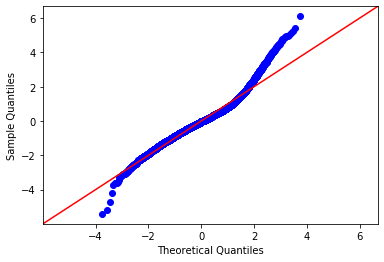

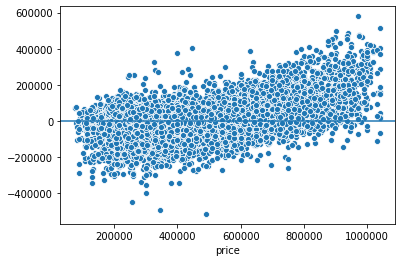

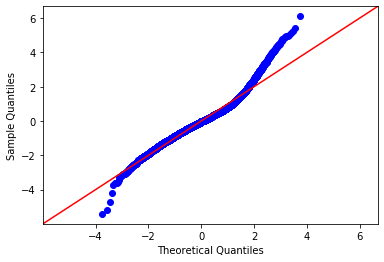

In [159]:
model_analysis(model_no_basement,no_basement_grp1)

### With Basement

In [160]:
with_basement = df_basement_1.loc[~(df_basement_1['basement'] == 0)]
with_basement

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,400.0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,910.0
5,1230000.0,3.133929,16.707174,18.926350,-0.600000,4.0,1.0,3.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1530.0
8,229500.0,-0.116071,-0.026218,0.098936,0.333333,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,730.0
10,662500.0,1.473214,0.385828,0.261890,0.222222,1.0,0.0,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,414500.0,-0.625000,-1.123118,-1.304836,-0.733333,1.0,-1.0,-1.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,190.0
21574,1220000.0,2.678571,0.323472,0.690949,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1800.0
21579,520000.0,-0.339286,-1.175731,-1.271925,-0.711111,1.0,-1.0,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,50.0
21590,1010000.0,1.428571,-0.074048,-0.284969,-0.755556,2.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,910.0


In [161]:
with_basement_grp1 = IQR_remove_outlier(with_basement,'price')
with_basement_grp1 = IQR_remove_outlier(with_basement_grp1,'sqft_lot')
with_basement_grp1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,400.0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,910.0
8,229500.0,-0.116071,-0.026218,0.098936,0.333333,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,730.0
10,662500.0,1.473214,0.385828,0.261890,0.222222,1.0,0.0,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1700.0
11,468000.0,-0.669643,-0.286625,-0.325105,0.711111,0.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,414500.0,-0.625000,-1.123118,-1.304836,-0.733333,1.0,-1.0,-1.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,190.0
21574,1220000.0,2.678571,0.323472,0.690949,-0.733333,4.0,1.0,1.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1800.0
21579,520000.0,-0.339286,-1.175731,-1.271925,-0.711111,1.0,-1.0,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,50.0
21590,1010000.0,1.428571,-0.074048,-0.284969,-0.755556,2.0,1.0,1.666667,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,910.0


In [162]:
numcol = num_col3.copy()
numcol.append('basement')
model_with_basement_grp1 = ols_model(catcol, numcol, with_basement_grp1)
model_with_basement_grp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     614.1
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:25   Log-Likelihood:                -91072.
No. Observations:                6965   AIC:                         1.822e+05
Df Residuals:                    6935   BIC:                         1.824e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                1.63e+05   8.28e+04      1.968      0.049     638.391    3.25e+05
C(floors_1half)[T.1]   -6670.5007   5785.512     -1.153      0.249    -1.8e+04    4670.874
C(floors_2)[T.1]       -3110.9969   5531.650     -0.562      0.574    -1.4e+04    7732.730
C(floors_2half)[T.1]   -1.933e+04   1.82e+04     -1.063      0.288    -5.5e+04    1.63e+04
C(floors_3)[T.1]        8857.7361   1.47e+04      0.602      0.547      -2e+04    3.77e+04
C(waterfront_1)[T.1]    1.929e+05   3.21e+04      6.005      0.000     1.3e+05    2.56e+05
C(view_1)[T.1]          4.821e+04   8888.847      5.424      0.000    3.08e+04    6.56e+04
C(view_2)[T.1]          5.948e+04   5858.280     10.153      0.000     4.8e+04     7.1e+04
C(view_3)[T.1]          8.013e+04   8891.296      9.012      0.000    6.27e+04    9.76e+04
C(view_4)[T.1]          1.721e+05   1.44e+04     11.979      0.000    1.44e+05       2e+05
C(condition_2)[T.1]     1.916e+05    8.4e+04      2.282      0.023     2.7e+04    3.56e+05
C(condition_3)[T.1]     2.174e+05    8.2e+04      2.652      0.008    5.67e+04    3.78e+05
C(condition_4)[T.1]     2.453e+05    8.2e+04      2.993      0.003    8.46e+04    4.06e+05
C(condition_5)[T.1]     2.799e+05    8.2e+04      3.412      0.001    1.19e+05    4.41e+05
C(east_urban)[T.1]       1.55e+05   1.17e+04     13.269      0.000    1.32e+05    1.78e+05
C(north)[T.1]           3.978e+04   1.27e+04      3.127      0.002    1.48e+04    6.47e+04
C(north_seattle)[T.1]   4.673e+04   1.32e+04      3.530      0.000    2.08e+04    7.27e+04
C(seattle)[T.1]         1.469e+05   1.21e+04     12.163      0.000    1.23e+05    1.71e+05
C(south_rural)[T.1]    -6.228e+04   1.87e+04     -3.330      0.001   -9.89e+04   -2.56e+04
C(south_seattle)[T.1]   3974.7288   1.65e+04      0.241      0.809   -2.83e+04    3.63e+04
C(south_urban)[T.1]    -8.027e+04   1.17e+04     -6.848      0.000   -1.03e+05   -5.73e+04
C(renovated_True)[T.1]  3.901e+04   8433.842      4.625      0.000    2.25e+04    5.55e+04
sqft_living             1.526e+05   5394.495     28.292      0.000    1.42e+05    1.63e+05
sqft_lot               -8206.1507   4153.252     -1.976      0.048   -1.63e+04     -64.505
sqft_lot15              2079.4404   3301.893      0.630      0.529   -4393.281    8552.162
age                     7.642e+04   3541.089     21.582      0.000    6.95e+04    8.34e+04
grade                   8.589e+04   2418.013     35.520      0.000    8.11e+04    9.06e+04
bedrooms               -6846.2274   1699.579     -4.028      0.000   -1.02e+04   -3514.533
bathrooms               1.253e+04   2304.488      5.437      0.000    8011.715     1.7e+04
basement                 -74.5281      7.232    -10.305      0.000     -88.706     -60.351
==============================================================================
O

,0
Intercept,162992
C(floors_1half)[T.1],-6670.5
C(floors_2)[T.1],-3111
C(floors_2half)[T.1],-19333
C(floors_3)[T.1],8857.74
C(waterfront_1)[T.1],192892
C(view_1)[T.1],48209
C(view_2)[T.1],59477.6
C(view_3)[T.1],80130.9
C(view_4)[T.1],172097


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]          False
C(floors_2half)[T.1]       True
C(floors_3)[T.1]          False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
sqft_living                True
sqft_lot                   True
sqft_lot15                False
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
basement                   True
dtype: bool

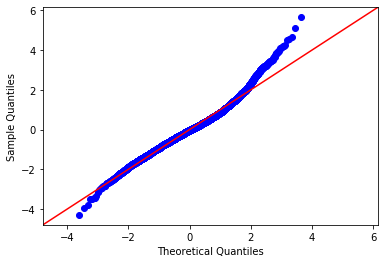

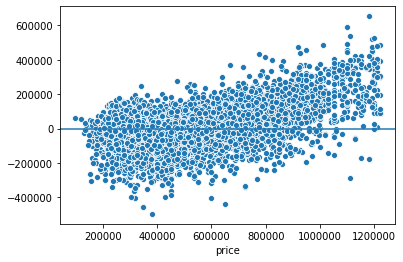

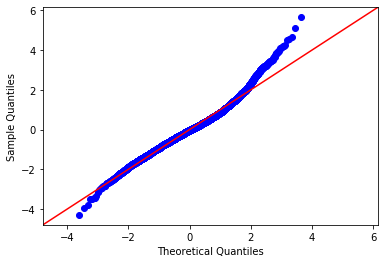

In [163]:
model_analysis(model_with_basement_grp1,with_basement_grp1)

In [164]:
abs_corr_with_basement = abs(with_basement_grp1[numcol].corr().round(3))
abs_corr_with_basement

,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,basement
sqft_living,1.000,0.319,0.270,0.135,0.589,0.509,0.602,0.712
sqft_lot,0.319,1.000,0.808,0.013,0.072,0.232,0.018,0.348
sqft_lot15,0.270,0.808,1.000,0.054,0.076,0.174,0.017,0.293
age,0.135,0.013,0.054,1.000,0.400,0.017,0.425,0.061
grade,0.589,0.072,0.076,0.400,1.000,0.169,0.531,0.218
bedrooms,0.509,0.232,0.174,0.017,0.169,1.000,0.389,0.434
bathrooms,0.602,0.018,0.017,0.425,0.531,0.389,1.000,0.311
basement,0.712,0.348,0.293,0.061,0.218,0.434,0.311,1.000


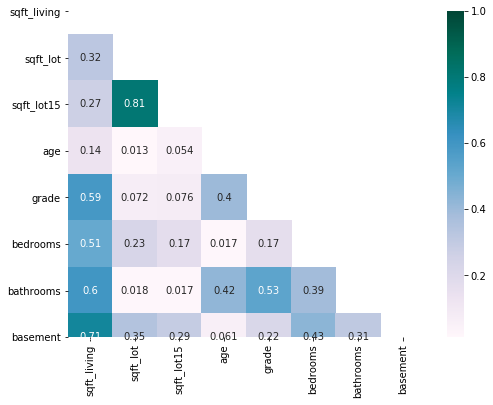

In [165]:
fig,ax = plt.subplots(figsize=(8,6))
mask = np.zeros_like(abs_corr_with_basement, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx]=True
sns.heatmap(abs_corr_with_basement, mask=mask, annot = True, cmap = 'PuBuGn');

In [166]:
with_basement_grp1.drop('sqft_lot15', axis =1, inplace = True)

In [167]:
numcol

['sqft_living',
 'sqft_lot',
 'sqft_lot15',
 'age',
 'grade',
 'bedrooms',
 'bathrooms',
 'basement']

In [168]:
numcol.pop(2)
model_with_basement_grp1 = ols_model(catcol, numcol, with_basement_grp1)
model_with_basement_grp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     636.1
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:07:27   Log-Likelihood:                -91072.
No. Observations:                6965   AIC:                         1.822e+05
Df Residuals:                    6936   BIC:                         1.824e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.631e+05   8.28e+04      1.970      0.049     769.789    3.25e+05
C(floors_1half)[T.1]   -6807.3911   5781.176     -1.178      0.239   -1.81e+04    4525.483
C(floors_2)[T.1]       -3264.2365   5526.055     -0.591      0.555   -1.41e+04    7568.523
C(floors_2half)[T.1]   -1.979e+04   1.82e+04     -1.089      0.276   -5.54e+04    1.58e+04
C(floors_3)[T.1]        8451.3331   1.47e+04      0.575      0.566   -2.04e+04    3.73e+04
C(waterfront_1)[T.1]    1.933e+05   3.21e+04      6.020      0.000     1.3e+05    2.56e+05
C(view_1)[T.1]          4.846e+04   8879.272      5.458      0.000    3.11e+04    6.59e+04
C(view_2)[T.1]          5.957e+04   5856.167     10.172      0.000    4.81e+04    7.11e+04
C(view_3)[T.1]           8.03e+04   8886.680      9.036      0.000    6.29e+04    9.77e+04
C(view_4)[T.1]          1.724e+05   1.44e+04     12.008      0.000    1.44e+05    2.01e+05
C(condition_2)[T.1]     1.921e+05    8.4e+04      2.288      0.022    2.75e+04    3.57e+05
C(condition_3)[T.1]     2.179e+05   8.19e+04      2.659      0.008    5.73e+04    3.79e+05
C(condition_4)[T.1]      2.46e+05    8.2e+04      3.001      0.003    8.53e+04    4.07e+05
C(condition_5)[T.1]     2.805e+05    8.2e+04      3.420      0.001     1.2e+05    4.41e+05
C(east_urban)[T.1]      1.544e+05   1.16e+04     13.259      0.000    1.32e+05    1.77e+05
C(north)[T.1]            3.94e+04   1.27e+04      3.100      0.002    1.45e+04    6.43e+04
C(north_seattle)[T.1]   4.595e+04   1.32e+04      3.486      0.000    2.01e+04    7.18e+04
C(seattle)[T.1]         1.458e+05    1.2e+04     12.193      0.000    1.22e+05    1.69e+05
C(south_rural)[T.1]    -6.273e+04   1.87e+04     -3.356      0.001   -9.94e+04   -2.61e+04
C(south_seattle)[T.1]   3312.2751   1.65e+04      0.201      0.840   -2.89e+04    3.56e+04
C(south_urban)[T.1]    -8.086e+04   1.17e+04     -6.920      0.000   -1.04e+05    -5.8e+04
C(renovated_True)[T.1]  3.912e+04   8431.726      4.639      0.000    2.26e+04    5.56e+04
sqft_living             1.527e+05   5393.189     28.312      0.000    1.42e+05    1.63e+05
sqft_lot               -6605.9467   3285.158     -2.011      0.044    -1.3e+04    -166.031
age                     7.642e+04   3540.925     21.582      0.000    6.95e+04    8.34e+04
grade                   8.593e+04   2416.867     35.555      0.000    8.12e+04    9.07e+04
bedrooms               -6878.8427   1698.715     -4.049      0.000   -1.02e+04   -3548.840
bathrooms                1.25e+04   2303.848      5.425      0.000    7981.556     1.7e+04
basement                 -74.5433      7.232    -10.308      0.000     -88.720     -60.367
==============================================================================
Omnibus:                      466.405   Durbin-Watson:                   1.991
Prob(Omnibus)

,0
Intercept,163116
C(floors_1half)[T.1],-6807.39
C(floors_2)[T.1],-3264.24
C(floors_2half)[T.1],-19792.6
C(floors_3)[T.1],8451.33
C(waterfront_1)[T.1],193331
C(view_1)[T.1],48463.5
C(view_2)[T.1],59570.5
C(view_3)[T.1],80303.5
C(view_4)[T.1],172400


Intercept                  True
C(floors_1half)[T.1]       True
C(floors_2)[T.1]          False
C(floors_2half)[T.1]       True
C(floors_3)[T.1]          False
C(waterfront_1)[T.1]       True
C(view_1)[T.1]             True
C(view_2)[T.1]             True
C(view_3)[T.1]             True
C(view_4)[T.1]             True
C(condition_2)[T.1]        True
C(condition_3)[T.1]        True
C(condition_4)[T.1]        True
C(condition_5)[T.1]        True
C(east_urban)[T.1]         True
C(north)[T.1]              True
C(north_seattle)[T.1]      True
C(seattle)[T.1]            True
C(south_rural)[T.1]        True
C(south_seattle)[T.1]     False
C(south_urban)[T.1]        True
C(renovated_True)[T.1]     True
sqft_living                True
sqft_lot                   True
age                        True
grade                      True
bedrooms                   True
bathrooms                  True
basement                   True
dtype: bool

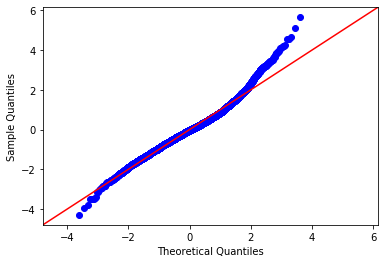

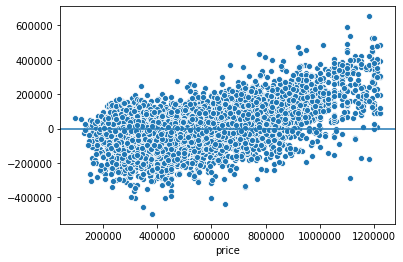

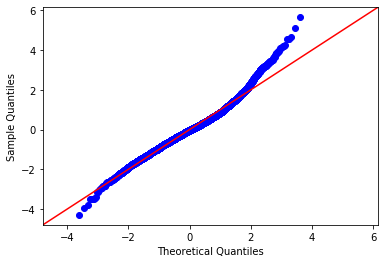

In [169]:
model_analysis(model_with_basement_grp1,with_basement_grp1)

## Model Validation

### Group1

In [170]:
df_train, df_test = train_test_split(group1_1,test_size=0.25, shuffle = True)
df_train.shape, df_test.shape

((13661, 31), (4554, 31))

In [171]:
model_train = ols_model(cat_col3, num_col3,df_train)
r2_train = r2_score(df_train['price'], model_train.predict(df_train))
print(f'Training data R2 = {round(r2_train,3)}')
r2_test = r2_score(df_test['price'], model_train.predict(df_test))
print(f'Test data R2 = {round(r2_test,3)}')

print(f'% difference = {abs((r2_train-r2_test)/r2_train)*100}')

Training data R2 = 0.744
Test data R2 = 0.741
% difference = 0.4373912678080841


### Group2

In [172]:
df_train2, df_test2 = train_test_split(group2_3,test_size=0.25, shuffle = True)
df_train2.shape, df_test2.shape

((62, 30), (21, 30))

In [173]:
model_train2=ols_model(cat_col4,num_col4,group2_3)

In [174]:
r2_train2 = r2_score(df_train2['price'], model_train2.predict(df_train2))
print(f'Training data R2 = {round(r2_train2,3)}')
r2_test2 = r2_score(df_test2['price'], model_train2.predict(df_test2))
print(f'Test data R2 = {round(r2_test2,3)}')

print(f'% difference = {abs((r2_train2-r2_test2)/r2_train2)*100}')

Training data R2 = 0.774
Test data R2 = 0.478
% difference = 38.270689670544975


## Interpretation

### Main

In [175]:
df_basement

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [176]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,age,subregion
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,NaN
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,NaN
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,NaN
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,NaN
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,NaN
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5,NaN
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,11,NaN


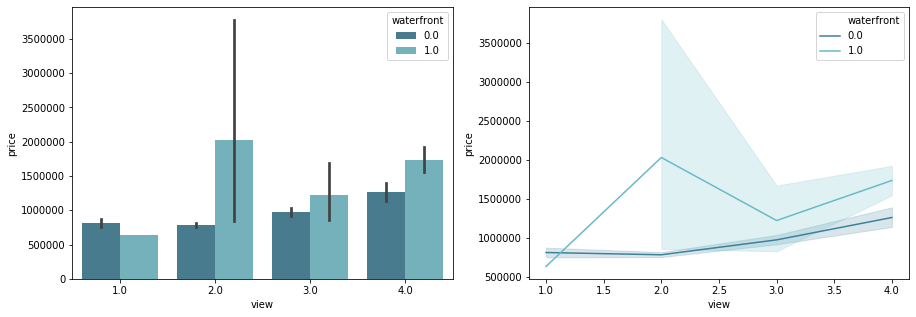

In [177]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes = axes.flatten()
sns.barplot(x=df.loc[~(df['view']==0),'view'],y=df['price'], hue=df['waterfront'], ax = axes[0], palette = "GnBu_d")
sns.lineplot(x=df.loc[~(df['view']==0),'view'],y=df['price'], hue=df['waterfront'], ax = axes[1], palette = "GnBu_d")
axes[0].set_facecolor('none')
axes[1].set_facecolor('none');

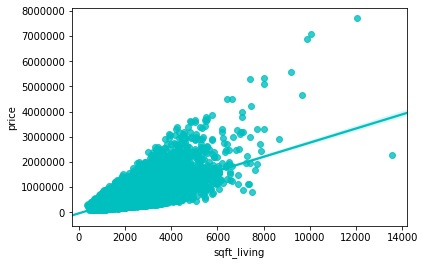

In [178]:
sns.regplot(x=df['sqft_living'],y=df['price'],color = "c");

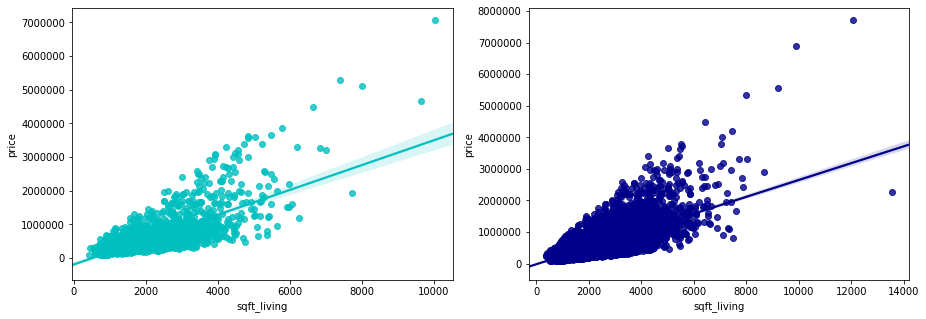

In [179]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes = axes.flatten()
sns.regplot(x=df.loc[~(df['waterfront']==0),'sqft_living'],y=df.loc[~(df['waterfront']==0),'price'], ax = axes[0],color = "c")
sns.regplot(x=df.loc[(df['waterfront']==0),'sqft_living'],y=df.loc[(df['waterfront']==0),'price'], ax = axes[1],color = "darkblue");

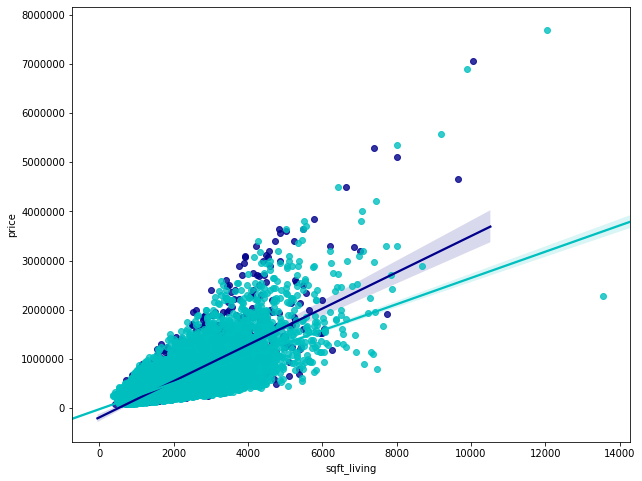

In [180]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))
sns.regplot(x=df.loc[~(df['waterfront']==0),'sqft_living'],y=df.loc[~(df['waterfront']==0),'price'], label = 'waterfront',color = "darkblue")
sns.regplot(x=df.loc[(df['waterfront']==0),'sqft_living'],y=df.loc[(df['waterfront']==0),'price'], label = 'not waterfront',color = "c");
axes.set_facecolor('none')

In [181]:
basement

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: basement, Length: 21597, dtype: bool

In [182]:
basement_analysis = pd.concat([df_basement,basement], axis = 1)

In [183]:
basement_analysis.loc[(basement_analysis['basement']==True),'basement']='Basement'
basement_analysis.loc[(basement_analysis['basement']==False),'basement']='No Basement'
basement_analysis

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True,basement
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,No Basement
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,Basement
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,No Basement
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,Basement
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,No Basement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,No Basement
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,No Basement
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,No Basement
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,No Basement


In [184]:
basement_analysis.basement.value_counts()

No Basement    13280
Basement        8317
Name: basement, dtype: int64

In [185]:
basement_analysis=pd.concat([basement_analysis,df.sqft_basement], axis = 1)

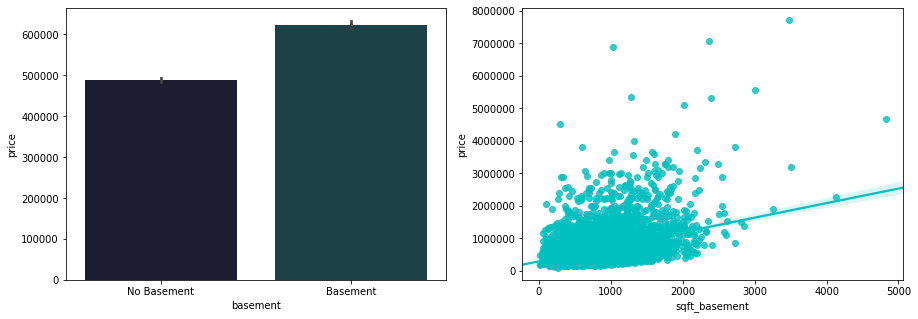

In [186]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axes = axes.flatten()
sns.barplot(x='basement',y='price', data = basement_analysis, ax = axes[0],palette=sns.color_palette("cubehelix", 8))
# sns.regplot(x=basement_analysis.loc[~(basement_analysis['basement']=='Basement'),'sqft_basement'],
#             y=basement_analysis.loc[~(basement_analysis['basement']=='Basement'),'price'], label = 'No Basement',
#             color = "darkblue", ax = axes[1])
sns.regplot(x=basement_analysis.loc[(basement_analysis['basement']=='Basement'),'sqft_basement'],
            y=basement_analysis.loc[(basement_analysis['basement']=='Basement'),'price'], label = 'Basement',
            color = "c",ax = axes[1]);
axes[0].set_facecolor('none')
axes[1].set_facecolor('none')

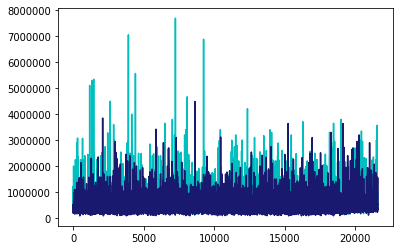

In [187]:
plt.plot(basement_analysis.loc[(basement_analysis['basement']=='Basement'),'price'], color = 'c')
plt.plot(basement_analysis.loc[~(basement_analysis['basement']=='Basement'),'price'], color = 'midnightblue')

#### All features ####

Source: https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/

In [188]:
model_3.conf_int()

,0,1
Intercept,308210.553753,451862.430910
C(floors_1half)[T.1],-33395.520527,-12909.306219
C(floors_2)[T.1],-44308.590036,-28168.823972
C(floors_2half)[T.1],56395.799963,118282.782734
C(floors_3)[T.1],-22260.034288,15075.221767
C(floors_3half)[T.1],-22569.681023,265605.929949
C(waterfront_1)[T.1],524177.690278,601370.904157
C(view_1)[T.1],81770.224048,124394.947416
C(view_2)[T.1],48376.828382,74219.704272
C(view_3)[T.1],108658.111409,143912.836471


In [189]:
err_series = model_3.params - model_3.conf_int()[0]
err_series

Intercept                  71825.938578
C(floors_1half)[T.1]       10243.107154
C(floors_2)[T.1]            8069.883032
C(floors_2half)[T.1]       30943.491386
C(floors_3)[T.1]           18667.628028
C(floors_3half)[T.1]      144087.805486
C(waterfront_1)[T.1]       38596.606939
C(view_1)[T.1]             21312.361684
C(view_2)[T.1]             12921.437945
C(view_3)[T.1]             17627.362531
C(view_4)[T.1]             26761.923885
C(condition_2)[T.1]        76454.804515
C(condition_3)[T.1]        70951.863992
C(condition_4)[T.1]        70949.195156
C(condition_5)[T.1]        71356.272293
C(east_urban)[T.1]         12555.381992
C(north)[T.1]              15892.006838
C(north_seattle)[T.1]      18401.270291
C(seattle)[T.1]            13689.788349
C(south_rural)[T.1]        16640.423026
C(south_seattle)[T.1]      25429.864669
C(south_urban)[T.1]        12585.600718
C(renovated_True)[T.1]     15765.103463
C(basement_True)[T.1]       6506.687911
sqft_living                 6761.269806


In [190]:
coef_df = pd.DataFrame({'coef': model_3.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-23152.413373,10243.107154,C(floors_1half)[T.1]
1,-36238.707004,8069.883032,C(floors_2)[T.1]
2,87339.291348,30943.491386,C(floors_2half)[T.1]
3,-3592.406260,18667.628028,C(floors_3)[T.1]
4,121518.124463,144087.805486,C(floors_3half)[T.1]
5,562774.297217,38596.606939,C(waterfront_1)[T.1]
6,103082.585732,21312.361684,C(view_1)[T.1]
7,61298.266327,12921.437945,C(view_2)[T.1]
8,126285.473940,17627.362531,C(view_3)[T.1]
9,298083.627733,26761.923885,C(view_4)[T.1]


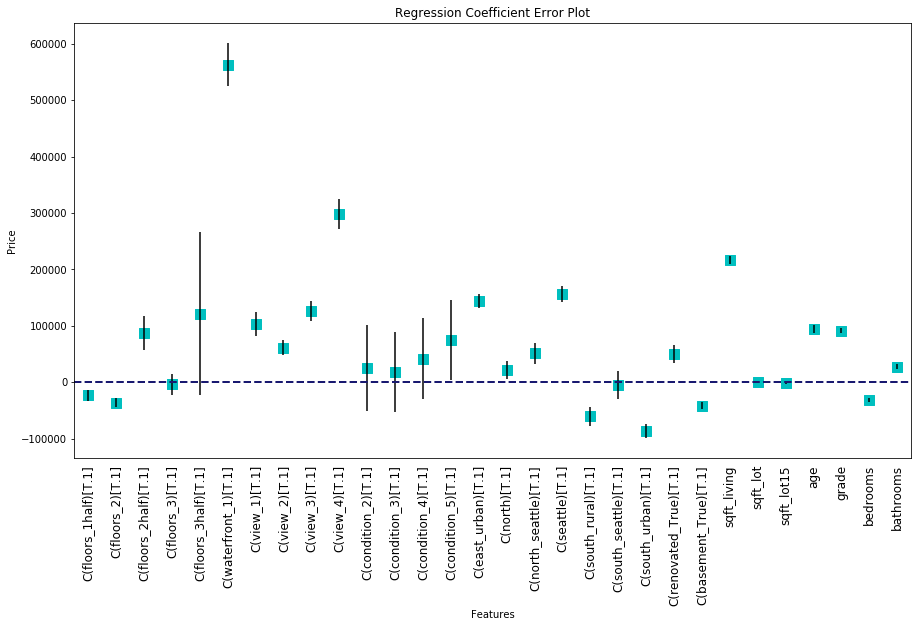

In [191]:
fig, ax = plt.subplots(figsize=(15, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('Price')
ax.set_xlabel('Features')
ax.set_title('Regression Coefficient Error Plot')
ax.set_facecolor('none')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='c')
ax.axhline(y=0, linestyle='--', color='midnightblue', linewidth=2)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(coef_df.varname, 
                       rotation=90, fontsize=12)

In [192]:
def feature_err_plot (model):
    """Creates a coefficient plot for the regression model
    Input:
    model (statsmodels OLS model object)
    Output:
    matplotlib coeffplot
    """
    err_series = model.params - model.conf_int()[0]
    coef_df = pd.DataFrame({'coef': model.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
    
    fig, ax = plt.subplots(figsize=(15, 8))
    coef_df.plot(x='varname', y='coef', kind='bar', ax=ax, color='none', yerr='err', legend=False)
    ax.set_ylabel('Price')
    ax.set_xlabel('Features')
    ax.set_title('Regression Coefficient Error Plot')
    ax.set_facecolor('none')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), marker='s', s=120, y=coef_df['coef'], color='c')
    ax.axhline(y=0, linestyle='--', color='midnightblue', linewidth=2)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(coef_df.varname, rotation=90, fontsize=12)
    plt.show()

### Group 1

All features:

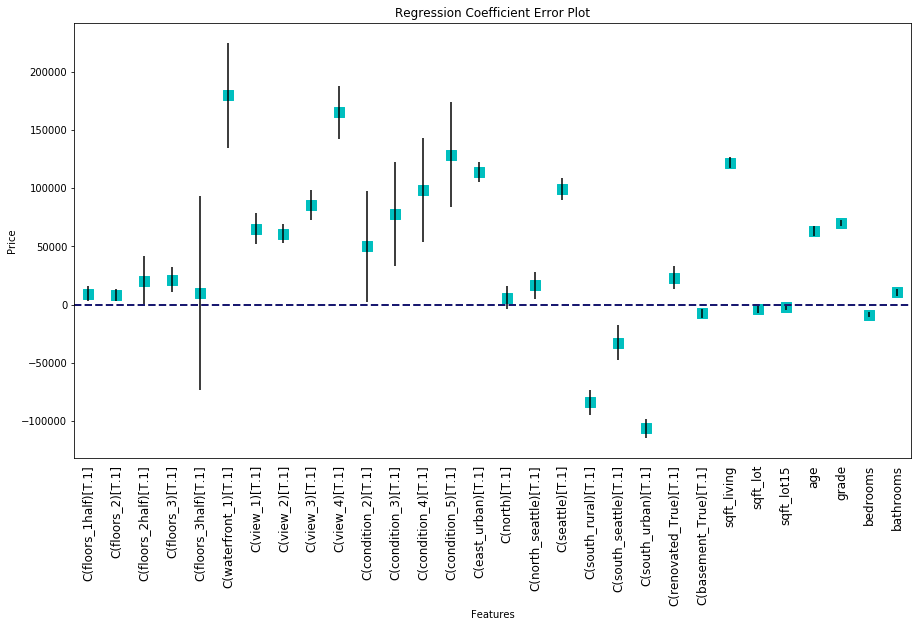

In [193]:
feature_err_plot(model_group1_1)

In [194]:
group1_1

,price,sqft_living,sqft_lot,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,east_urban,north,north_seattle,seattle,south_rural,south_seattle,south_urban,renovated_True,basement_True
0,221900.0,-0.651786,-0.348627,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0.589286,-0.066608,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,180000.0,-1.017857,0.421966,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.044643,-0.463773,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,510000.0,-0.205357,0.081842,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21593,400000.0,0.357143,-0.319752,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,-0.794643,-1.110363,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
21595,400000.0,-0.276786,-0.926484,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [195]:
group1_analysis = pd.concat([df.copy(),basement_analysis['basement']], axis =1)
group1_analysis = IQR_remove_outlier(group1_analysis,'price')
group1_analysis = IQR_remove_outlier(group1_analysis,'sqft_lot')

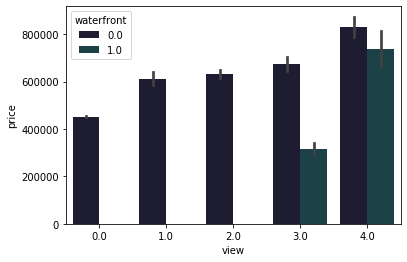

In [196]:
sns.barplot('view','price', hue = 'waterfront', data = group1_analysis, palette = sns.color_palette("cubehelix", 8))
ax.set_facecolor('none');

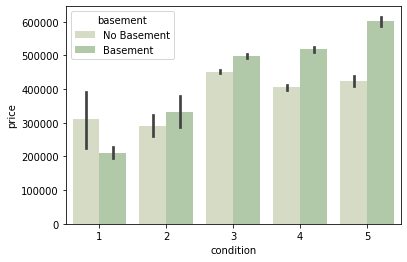

In [197]:
sns.barplot('condition','price', hue = 'basement', data = group1_analysis, 
            palette = sns.cubehelix_palette(8, start=.5, rot=-.75));
ax.set_facecolor('none')

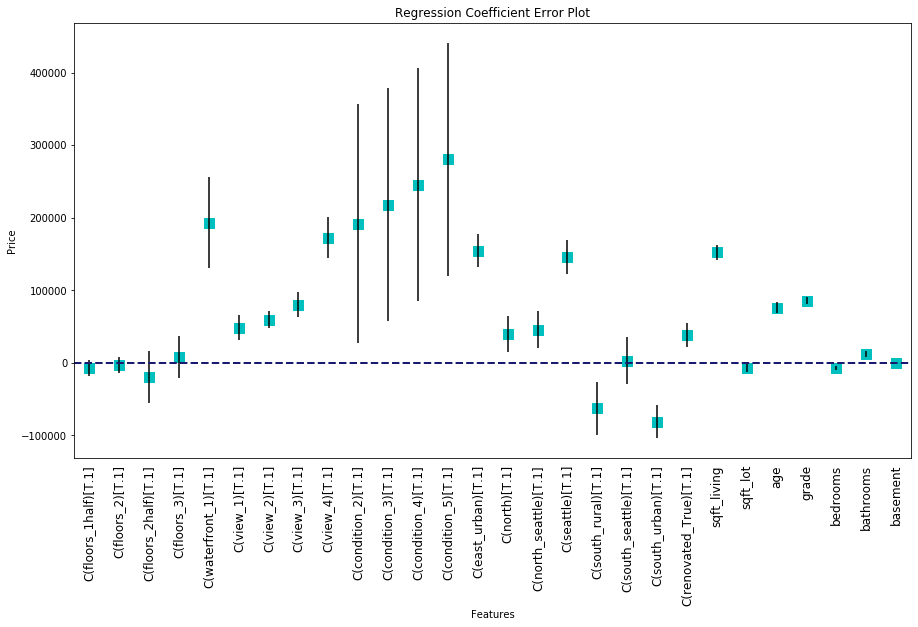

In [198]:
feature_err_plot(model_with_basement_grp1)

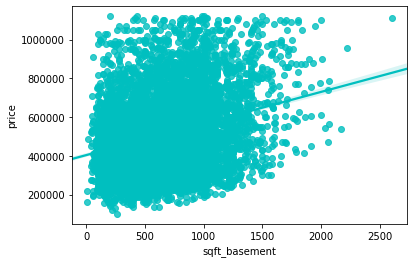

In [199]:
sns.regplot(x=group1_analysis.loc[(group1_analysis['basement']=='Basement'),'sqft_basement'],
            y=group1_analysis.loc[(group1_analysis['basement']=='Basement'),'price'], label = 'Basement',
            color = "c");

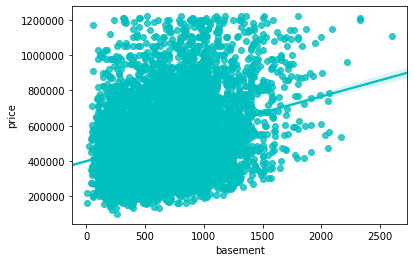

In [200]:
sns.regplot(x='basement',
            y='price',data = with_basement_grp1,
            color = "c");

In [201]:
f = 'price~basement'
model = ols(formula=f, data=with_basement_grp1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     668.2
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          9.01e-141
Time:                        21:07:44   Log-Likelihood:                -95183.
No. Observations:                6965   AIC:                         1.904e+05
Df Residuals:                    6963   BIC:                         1.904e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.988e+05   5468.336     72.935      0.000    3.88e+05     4.1e+05
basement     183.2906      7.091     25.850      0.000     169.391     197.190
==============================================================================
Omnibus:                      515.310   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.112
Skew:                           0.726   Prob(JB):                    2.02e-138
Kurtosis:                       3.278   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Group 2

All features:

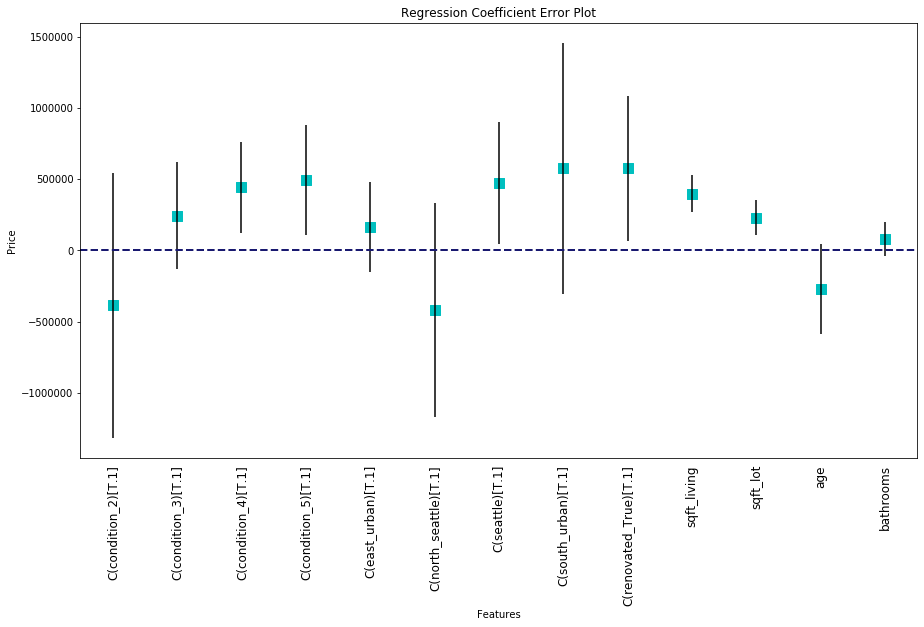

In [202]:
feature_err_plot(model_group2_3)

In [203]:
group2_analysis = pd.concat([df.copy(),basement_analysis['basement'],renovated2], axis =1)
group2_analysis = IQR_remove_outlier(group2_analysis,'sqft_lot')
group2_analysis = group2_analysis[(group2_analysis['price']>2500000)]
group2_analysis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,age,subregion,basement,renovated_b4
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,2014,12,NaN,Basement,False
2038,9471200200,2015-03-25,2530000.0,4,4.25,5040,16048,1.0,0.0,3.0,3,10,3420,1620.0,1950,NaN,98105,47.6702,-122.260,3960,14000,2015,65,NaN,Basement,False
2265,3859900060,2015-01-12,2750000.0,5,4.00,6300,16065,2.0,0.0,1.0,3,12,4360,1940.0,2004,0.0,98004,47.5922,-122.207,3260,17287,2015,11,NaN,Basement,False
2442,7524900003,2014-12-10,3280000.0,2,1.75,6840,10000,2.5,1.0,4.0,3,11,4350,2490.0,2001,0.0,98008,47.6042,-122.112,3120,12300,2014,13,NaN,Basement,False
2862,4114601570,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1.0,4.0,3,10,3420,1600.0,1941,2002.0,98144,47.5925,-122.287,3680,12620,2014,73,NaN,Basement,True
2897,9808100100,2015-02-02,3000000.0,5,3.25,5370,14091,2.0,0.0,0.0,3,10,3850,1520.0,1918,2008.0,98004,47.6499,-122.216,2410,12047,2015,97,NaN,Basement,True
3381,1118001408,2014-11-24,2540000.0,5,4.75,5410,13431,2.0,0.0,0.0,4,10,5050,360.0,1941,0.0,98112,47.6306,-122.288,3750,11596,2014,73,NaN,Basement,False
3809,1118000301,2014-12-19,2890000.0,4,4.00,5780,7173,2.0,0.0,0.0,3,11,4130,1650.0,2008,NaN,98112,47.6374,-122.288,3930,7994,2014,6,NaN,Basement,False
4145,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,3,12,5760,1320.0,2008,0.0,98039,47.6151,-122.224,3140,15996,2014,6,NaN,Basement,False
5444,6065300840,2015-05-01,2850000.0,4,4.00,5040,17208,1.0,0.0,0.0,5,10,2870,2170.0,1976,0.0,98006,47.5701,-122.188,4050,18647,2015,39,NaN,Basement,False


In [204]:
group2_analysis.loc[(group2_analysis['renovated_b4']==True),'renovated_b4']='Renovated'
group2_analysis.loc[(group2_analysis['renovated_b4']==False),'renovated_b4']='Not Renovated'
group2_analysis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,age,subregion,basement,renovated_b4
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,2014,12,NaN,Basement,Not Renovated
2038,9471200200,2015-03-25,2530000.0,4,4.25,5040,16048,1.0,0.0,3.0,3,10,3420,1620.0,1950,NaN,98105,47.6702,-122.260,3960,14000,2015,65,NaN,Basement,Not Renovated
2265,3859900060,2015-01-12,2750000.0,5,4.00,6300,16065,2.0,0.0,1.0,3,12,4360,1940.0,2004,0.0,98004,47.5922,-122.207,3260,17287,2015,11,NaN,Basement,Not Renovated
2442,7524900003,2014-12-10,3280000.0,2,1.75,6840,10000,2.5,1.0,4.0,3,11,4350,2490.0,2001,0.0,98008,47.6042,-122.112,3120,12300,2014,13,NaN,Basement,Not Renovated
2862,4114601570,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1.0,4.0,3,10,3420,1600.0,1941,2002.0,98144,47.5925,-122.287,3680,12620,2014,73,NaN,Basement,Renovated
2897,9808100100,2015-02-02,3000000.0,5,3.25,5370,14091,2.0,0.0,0.0,3,10,3850,1520.0,1918,2008.0,98004,47.6499,-122.216,2410,12047,2015,97,NaN,Basement,Renovated
3381,1118001408,2014-11-24,2540000.0,5,4.75,5410,13431,2.0,0.0,0.0,4,10,5050,360.0,1941,0.0,98112,47.6306,-122.288,3750,11596,2014,73,NaN,Basement,Not Renovated
3809,1118000301,2014-12-19,2890000.0,4,4.00,5780,7173,2.0,0.0,0.0,3,11,4130,1650.0,2008,NaN,98112,47.6374,-122.288,3930,7994,2014,6,NaN,Basement,Not Renovated
4145,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,3,12,5760,1320.0,2008,0.0,98039,47.6151,-122.224,3140,15996,2014,6,NaN,Basement,Not Renovated
5444,6065300840,2015-05-01,2850000.0,4,4.00,5040,17208,1.0,0.0,0.0,5,10,2870,2170.0,1976,0.0,98006,47.5701,-122.188,4050,18647,2015,39,NaN,Basement,Not Renovated


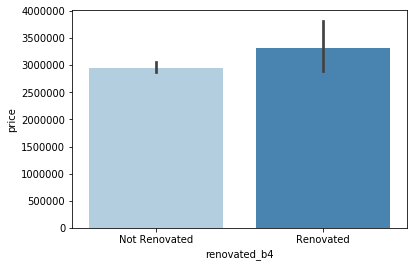

In [212]:
sns.barplot('renovated_b4','price', data = group2_analysis, palette = 'Blues')
ax.set_facecolor('none');

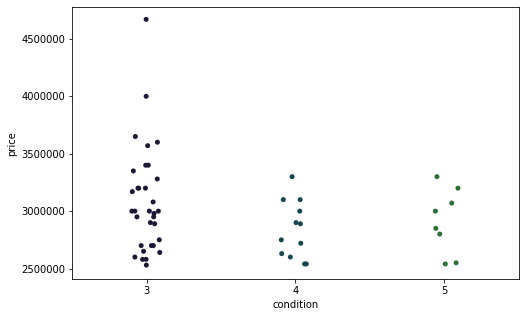

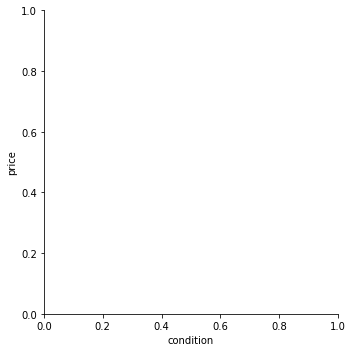

In [215]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5))
sns.catplot('condition','price', data = group2_analysis, palette = sns.color_palette("cubehelix", 8), ax = axes);

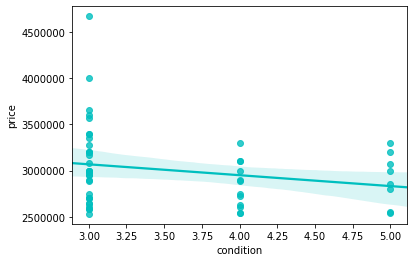

In [207]:
sns.regplot('condition','price', data = group2_analysis,color = 'c')

### Location

In [208]:
zipcode_analysis = df_base.copy()
zipcode_analysis.drop('zipcode', axis = 1, inplace = True)
zipcode_analysis = pd.concat([zipcode_analysis,df.zipcode], axis = 1)
zipcode_analysis['subregion']=np.NaN
for name, region in subregions.items():
    zipcode_analysis.loc[zipcode_analysis['zipcode'].isin(region),'subregion']= name
zipcode_analysis

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_lot15,age,grade,bedrooms,bathrooms,floors_1half,floors_2,floors_2half,floors_3,floors_3half,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,zipcode,subregion
0,221900.0,-0.651786,-0.348627,0.000000,-0.292895,-0.128079,-0.395344,0.422222,0.0,0.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98178,south_urban
1,538000.0,0.589286,-0.066608,0.714286,0.721121,-0.433498,0.003813,0.511111,0.0,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,98125,seattle
2,180000.0,-1.017857,0.421966,0.000000,0.802803,-0.009852,0.088702,0.933333,-1.0,-1.0,-1.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98028,north
3,604000.0,0.044643,-0.463773,1.625000,-0.246496,-0.798030,-0.525788,0.200000,0.0,1.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,98136,seattle
4,510000.0,-0.205357,0.081842,0.000000,0.217496,0.916256,-0.023480,-0.266667,1.0,0.0,-0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98074,east_urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.339286,-1.149159,0.000000,0.616240,-0.566502,-1.226370,-0.777778,1.0,0.0,0.333333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,98103,seattle
21593,400000.0,0.357143,-0.319752,0.000000,-0.295312,-0.645320,-0.084287,-0.866667,1.0,1.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,98146,south_seattle
21594,402101.0,-0.794643,-1.110363,0.000000,0.109232,-0.334975,-1.126430,-0.777778,0.0,-1.0,-2.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,98144,seattle
21595,400000.0,-0.276786,-0.926484,0.000000,-0.180280,0.798030,-1.270921,-0.644444,1.0,0.0,0.333333,0,1,0,0,0,0,0,0,0,0,0,1,0,0,98027,east_urban


In [209]:
zipcode_analysis['subregion'].value_counts()

seattle          6233
east_urban       5694
south_urban      5278
north            1197
south_rural       922
east_rural        842
north_seattle     748
south_seattle     288
Name: subregion, dtype: int64

Map created in Tableau

In [210]:
# !pip install openpyxl

In [211]:
# zipcode_analysis.to_excel('~\Documents\zipcode.xlsx')

https://public.tableau.com/profile/neha4207#!/vizhome/Mod2_Project_Zipcodes/Sheet1?publish=yes

https://public.tableau.com/profile/neha4207#!/vizhome/Mod2_Project_Zip_Subregion/Sheet1?publish=yes

## Recommendation

> Refer to the price range in the subregion that the house is in for an initial expectation. Also consider whether the house is at the waterfront, since this has a significantly high influence on price.

> To get the highest offer, consider acquiring a greater number of views. This can be done by various means of marketing, including digital marketing, professional videography, and/or 360° view of the house.

> Maintain the highest standards of condition of the house, it being one of the major determinants of the price, to attract higher investments.

> If considering renovation, consider building a basement, which most often then not is included in the sqft living and won't be a heavy investment on your side. Further, keep the majority demographic in mind while choosing the theme of the house for renovation purposes. Most of the high-end houses have undergone renovations per the current trends and are maintained in excellent condition.

## Future Work

> Generating separate models based on locations, and subset of waterfront, to make it easier for the audience to decide on the most determinant feature in their neighborhood.

> Analyze the renovated features to interpret the most influencing feature that can be modified to significantly increase the cost of the house 

> Test the hypothesis that modern themed, huge spaced, renovations tend to be pricier, and explore the impact of other themes (e.g. antique) on the pricing

> Generate an interactive tool where the audience will have an ability to choose which feature, they already have, and what can be modified to give a resulting price of their house.